In [ ]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# from sklearn import ?
# from sklearn.metrics import ?

<br>

## 1. Preparing dataset (2번부터 실습 진행)

In [ ]:
import os

os.getcwd()

'/content'

In [1]:
from google.colab import drive

drive.mount("/content/drive")

Mounted at /content/drive


In [119]:
from sklearn.model_selection import train_test_split

import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/도원결의 시즌2/dowon/도원/titanic.csv', encoding='utf-8', engine='python')

x_train, x_test, y_train, y_test = train_test_split(
    df.drop(['Survived'], axis=1),
    df['Survived'],
    test_size=0.3, shuffle=True, 
    stratify=df['Survived']
)

df = pd.concat([x_train, y_train], axis=1)
df

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
859,860,3,"Razi, Mr. Raihed",male,NaN,0,0,2629,7.2292,NaN,C,0
778,779,3,"Kilgannon, Mr. Thomas J",male,NaN,0,0,36865,7.7375,NaN,Q,0
701,702,1,"Silverthorne, Mr. Spencer Victor",male,35.0,0,0,PC 17475,26.2875,E24,S,1
422,423,3,"Zimmerman, Mr. Leo",male,29.0,0,0,315082,7.8750,NaN,S,0
270,271,1,"Cairns, Mr. Alexander",male,NaN,0,0,113798,31.0000,NaN,S,0
...,...,...,...,...,...,...,...,...,...,...,...,...
335,336,3,"Denkoff, Mr. Mitto",male,NaN,0,0,349225,7.8958,NaN,S,0
576,577,2,"Garside, Miss. Ethel",female,34.0,0,0,243880,13.0000,NaN,S,1
47,48,3,"O'Driscoll, Miss. Bridget",female,NaN,0,0,14311,7.7500,NaN,Q,1
771,772,3,"Jensen, Mr. Niels Peder",male,48.0,0,0,350047,7.8542,NaN,S,0


### 전처리

In [ ]:
import numpy as np

def unify_cabin(x):
    result = ""
    if type(x) == float:
        return np.nan
    result = x[0]
    return result

In [ ]:
from sklearn.preprocessing import LabelEncoder

import math
import warnings

warnings.filterwarnings("ignore")

## PassengerID column 제거
df.drop(['PassengerId'], axis=1, inplace=True)

## Age column 결측값 채우기
cond_1 = df.loc[(df.SibSp == 0) & (df.Parch == 0)].index
cond_2 = df.loc[(df.Pclass == 3) | (df.Sex == "male") | (df.Survived == 0)].index
new_df = df.loc[cond_1 & cond_2]
df.Age.fillna(int(round(new_df.Age.mean(), 0)), inplace=True)
df.loc[df.Age % 1 != 0, "Age"] = df.loc[df.Age % 1 != 0, "Age"].apply(math.floor)
df.Age = df.Age.astype(int)

## Embarked column 처리 [결측값, 원핫인코딩]
df.Embarked.fillna("S", inplace=True)
df = pd.concat([df, pd.get_dummies(df.Embarked)], axis=1)
df.drop(['Embarked'], axis=1, inplace=True)

## Cabin 결측값 처리
# df.drop(['Cabin'], axis=1, inplace=True)
df.Cabin = df.Cabin.apply(unify_cabin)
cabin_columns = df.Cabin.unique()

encoder = LabelEncoder()
df.Cabin = encoder.fit_transform(df.Cabin)
df

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,C,Q,S
0,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,8,0,0,1
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,2,1,0,0
2,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,8,0,0,1
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,2,0,0,1
4,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,8,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,"Montvila, Rev. Juozas",male,27,0,0,211536,13.0000,8,0,0,1
887,1,1,"Graham, Miss. Margaret Edith",female,19,0,0,112053,30.0000,1,0,0,1
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,32,1,2,W./C. 6607,23.4500,8,0,0,1
889,1,1,"Behr, Mr. Karl Howell",male,26,0,0,111369,30.0000,2,1,0,0


In [ ]:
x_test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             73
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          283
Embarked         1
dtype: int64

In [ ]:
y_train

727    1
867    0
485    0
323    1
775    0
      ..
235    0
478    0
58     1
328    1
823    1
Name: Survived, Length: 534, dtype: int64

In [ ]:
y_test

137    0
340    1
70     0
564    0
44     1
      ..
366    1
480    0
380    1
83     0
649    1
Name: Survived, Length: 357, dtype: int64

## Data Info
- **PassengerId** : 승객 ID
- **Survived** : 생존 여부 => 1은 생존, 2는 사망.
- **Pclass** : 티켓 클래스 (1 = 1st, 2 = 2nd, 3 = 3rd)
- **Name** : 승객의 이름
- **Age** : 연령
- **Sibsp** : 같이 탑승한 형재자매, 배우자의 수
- **Parch** : 같이 탑승한 부모 / 자녀들의 수
- **Ticket** : 티켓 번호
- **Fare** : 승객 요금
- **Cabin** : 객실 번호
- **Embarked** : 기항지 위치 (C = Cherbourg, Q = Queenstown, S = Southampton)

1912년 4월 10일 영국의 **사우샘프턴** 44부두에서 출항해 프랑스의 **쉘부르**와 아일랜드의 **퀸즈타운**에 기항한 후 4월 17일 아침 미국 뉴욕에 도착 할 예정이었음.

<br>

## 2. Feature engineering & Feature selection

#### 시도해볼 수 있는 전략들

- 불필요한 열이나 예측에 방해가 되는 열은 아예 지우기 (ex. PassengerId)
- 결측치 채우기 
- Text로 되어있는 Category(Factor)는 숫자로 바꿔주기 (ex. Male/Female -> 0/1)
- 실수 범위를 구간 범위로 바꿔주기 
- 필요한 경우 기존 열을 바탕으로 새로운 열을 계산해 추가하기

In [ ]:
df = pd.concat([x_train, y_train], axis=1)
df

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
727,3,"Mannion, Miss. Margareth",female,NaN,0,0,36866,7.7375,NaN,Q,1
867,1,"Roebling, Mr. Washington Augustus II",male,31.0,0,0,PC 17590,50.4958,A24,S,0
485,3,"Lefebre, Miss. Jeannie",female,NaN,3,1,4133,25.4667,NaN,S,0
323,2,"Caldwell, Mrs. Albert Francis (Sylvia Mae Harb...",female,22.0,1,1,248738,29.0000,NaN,S,1
775,3,"Myhrman, Mr. Pehr Fabian Oliver Malkolm",male,18.0,0,0,347078,7.7500,NaN,S,0
...,...,...,...,...,...,...,...,...,...,...,...
235,3,"Harknett, Miss. Alice Phoebe",female,NaN,0,0,W./C. 6609,7.5500,NaN,S,0
478,3,"Karlsson, Mr. Nils August",male,22.0,0,0,350060,7.5208,NaN,S,0
58,2,"West, Miss. Constance Mirium",female,5.0,1,2,C.A. 34651,27.7500,NaN,S,1
328,3,"Goldsmith, Mrs. Frank John (Emily Alice Brown)",female,31.0,1,1,363291,20.5250,NaN,S,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 534 entries, 727 to 823
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    534 non-null    int64  
 1   Name      534 non-null    object 
 2   Sex       534 non-null    object 
 3   Age       430 non-null    float64
 4   SibSp     534 non-null    int64  
 5   Parch     534 non-null    int64  
 6   Ticket    534 non-null    object 
 7   Fare      534 non-null    float64
 8   Cabin     130 non-null    object 
 9   Embarked  533 non-null    object 
 10  Survived  534 non-null    int64  
dtypes: float64(2), int64(4), object(5)
memory usage: 50.1+ KB


In [ ]:
df.isnull().sum()

Pclass        0
Name          0
Sex           0
Age         104
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       404
Embarked      1
Survived      0
dtype: int64

In [ ]:
# # 기본적인 결측치 채우는 방법
# mean_age = x_data['Age'].median(skipna=True)
# x_data['Age'] = x_data['Age'].fillna(mean_age) # or .fillna(int/float/str 값)

### 필요 전처리

1. 결측값 => ['Age', 'Cabin', 'Embarked']
2. object column
3. 중복값 처리 => ['Ticket']
  3.1 'Ticket' column의 중복값은 그냥 놔두기로 함.

## EDA

### PassengerID


In [ ]:
df

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
181,182,2,"Pernot, Mr. Rene",male,NaN,0,0,SC/PARIS 2131,15.0500,NaN,C,0
5,6,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,0
608,609,2,"Laroche, Mrs. Joseph (Juliette Marie Louise La...",female,22.0,1,2,SC/Paris 2123,41.5792,NaN,C,1
413,414,2,"Cunningham, Mr. Alfred Fleming",male,NaN,0,0,239853,0.0000,NaN,S,0
167,168,3,"Skoog, Mrs. William (Anna Bernhardina Karlsson)",female,45.0,1,4,347088,27.9000,NaN,S,0
...,...,...,...,...,...,...,...,...,...,...,...,...
727,728,3,"Mannion, Miss. Margareth",female,NaN,0,0,36866,7.7375,NaN,Q,1
364,365,3,"O'Brien, Mr. Thomas",male,NaN,1,0,370365,15.5000,NaN,Q,0
314,315,2,"Hart, Mr. Benjamin",male,43.0,1,1,F.C.C. 13529,26.2500,NaN,S,0
420,421,3,"Gheorgheff, Mr. Stanio",male,NaN,0,0,349254,7.8958,NaN,C,0


In [ ]:
df.drop(['PassengerId'], axis=1, inplace=True)

In [ ]:
df.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
181,2,"Pernot, Mr. Rene",male,NaN,0,0,SC/PARIS 2131,15.0500,NaN,C,0
5,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,0
608,2,"Laroche, Mrs. Joseph (Juliette Marie Louise La...",female,22.0,1,2,SC/Paris 2123,41.5792,NaN,C,1
413,2,"Cunningham, Mr. Alfred Fleming",male,NaN,0,0,239853,0.0000,NaN,S,0
167,3,"Skoog, Mrs. William (Anna Bernhardina Karlsson)",female,45.0,1,4,347088,27.9000,NaN,S,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 623 entries, 181 to 128
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    623 non-null    int64  
 1   Name      623 non-null    object 
 2   Sex       623 non-null    object 
 3   Age       492 non-null    float64
 4   SibSp     623 non-null    int64  
 5   Parch     623 non-null    int64  
 6   Ticket    623 non-null    object 
 7   Fare      623 non-null    float64
 8   Cabin     154 non-null    object 
 9   Embarked  621 non-null    object 
 10  Survived  623 non-null    int64  
dtypes: float64(2), int64(4), object(5)
memory usage: 58.4+ KB


In [ ]:
df.isnull().sum()

Pclass        0
Name          0
Sex           0
Age         131
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       469
Embarked      2
Survived      0
dtype: int64

In [ ]:
df[['Survived']]

,Survived
181,0
5,0
608,1
413,0
167,0
...,...
727,1
364,0
314,0
420,0


In [ ]:
# 클래스 불균형 문제
y_train.value_counts()

0    382
1    241
Name: Survived, dtype: int64

In [ ]:
df.describe()

,Pclass,Age,SibSp,Parch,Fare,Survived
count,623.000000,492.000000,623.000000,623.000000,623.000000,623.000000
mean,2.280899,29.843333,0.521669,0.380417,32.143184,0.386838
std,0.852312,14.567029,1.081455,0.818635,45.063449,0.487417
min,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,20.875000,0.000000,0.000000,7.925000,0.000000
50%,3.000000,28.000000,0.000000,0.000000,15.245800,0.000000
75%,3.000000,39.000000,1.000000,0.000000,32.750000,1.000000
max,3.000000,74.000000,8.000000,5.000000,512.329200,1.000000


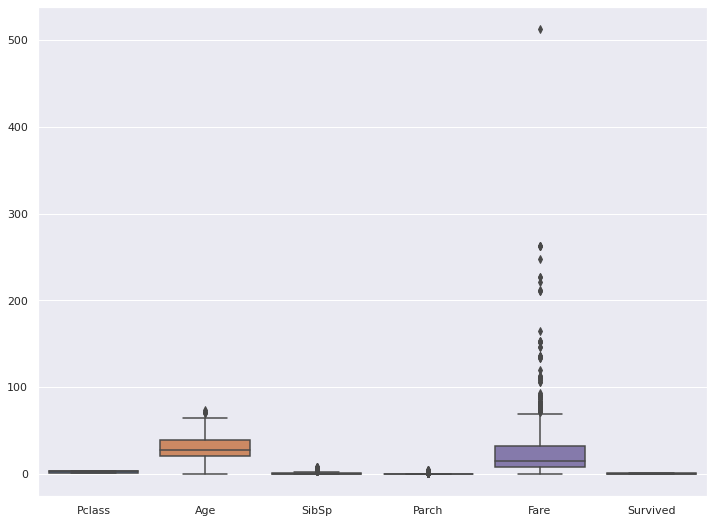

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

temp_df = df.copy()
temp_df.drop("Cabin", axis=1, inplace=True)
temp_df = temp_df.select_dtypes(exclude="object")

plt.rcParams['figure.figsize'] = (12, 9)

sns.set_theme()
sns.boxplot(data=temp_df)

plt.show()

### Pclass (객실 클래스) 탐색

1등급이 압도적으로 비싸고, 2 / 3 등급은 고만고만하다.

**[평균]**
- 1등급 : $ 84.15

- 2등급 : $ 20.66

- 3등급 : $ 13.68


**[생존여부]**
- 클래스 1 : 생존이 더 많음. (6 : 4 정도)
- 클래스 2 : 비슷비슷하다.
- 클래스 3 : 죽은 사람이 더 많다. (1 : 3 정도)

**결측값 없음**

In [ ]:
df.Pclass.value_counts()

3    342
1    152
2    129
Name: Pclass, dtype: int64

In [ ]:
df.loc[df.Pclass == 1, 'Survived'].value_counts()

1    93
0    59
Name: Survived, dtype: int64

In [ ]:
df.loc[df.Pclass == 2, 'Survived'].value_counts()

0    68
1    61
Name: Survived, dtype: int64

In [ ]:
df.loc[df.Pclass == 3, 'Survived'].value_counts()

0    257
1     85
Name: Survived, dtype: int64

In [ ]:
df.loc[df.Pclass == 1, 'Fare'].mean()

82.73105789473685

In [ ]:
df.loc[df.Pclass == 2, 'Fare'].mean()

20.166698449612404

In [ ]:
df.loc[df.Pclass == 3, 'Fare'].mean()

13.717725146198829

In [ ]:
df.loc[df.Embarked.isnull() == True]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived


In [ ]:
df.loc[df.Pclass == 1, 'Embarked'].value_counts()

S    88
C    62
Q     2
Name: Embarked, dtype: int64

In [ ]:
temp_df = df.loc[df.Pclass == 1]
temp_df.sort_values(by='Cabin').Cabin.value_counts().index[:100]

Index(['C23 C25 C27', 'B96 B98', 'B58 B60', 'E33', 'D20', 'B51 B53 B55', 'B5',
       'D17', 'C93', 'C92', 'D26', 'B77', 'C2', 'E44', 'C22 C26', 'C78', 'C86',
       'C83', 'D21', 'C68', 'C7', 'D19', 'D11', 'D15', 'C87', 'D10 D12', 'C99',
       'C85', 'C90', 'A14', 'D35', 'E24', 'E68', 'E67', 'E63', 'E58', 'E50',
       'E49', 'E40', 'E38', 'E36', 'E31', 'E17', 'D36', 'D9', 'D7', 'D6',
       'D50', 'D49', 'D48', 'D46', 'D45', 'D37', 'C62 C64', 'C65', 'C45',
       'C52', 'B20', 'B42', 'B41', 'B4', 'B39', 'B38', 'B37', 'B35', 'B30',
       'B22', 'B18', 'B50', 'B101', 'A7', 'A5', 'A36', 'A34', 'A32', 'A31',
       'A26', 'A20', 'B49', 'B57 B59 B63 B66', 'C50', 'C110', 'C49', 'C46',
       'A16', 'C32', 'C128', 'C126', 'C124', 'C123', 'C118', 'C106', 'B69',
       'C101', 'B94', 'B86', 'B82 B84', 'B80', 'B79', 'B78'],
      dtype='object')

In [ ]:
temp_df.loc[temp_df.Cabin.str.contains("A") == True, 'Fare'].mean()

41.22375000000001

In [ ]:
temp_df.loc[temp_df.Cabin.str.contains("B") == True, 'Fare'].mean()

120.03428571428572

In [ ]:
temp_df.loc[temp_df.Cabin.str.contains("C") == True, 'Fare'].mean()

101.65574324324325

In [ ]:
temp_df.loc[temp_df.Cabin.str.contains("D") == True, 'Fare'].mean()

63.56060909090909

In [ ]:
temp_df.loc[temp_df.Cabin.str.contains("E") == True, 'Fare'].mean()

56.99289411764706

In [ ]:
temp_df.loc[temp_df.Cabin.str.contains("T") == True, 'Fare'].mean()

nan

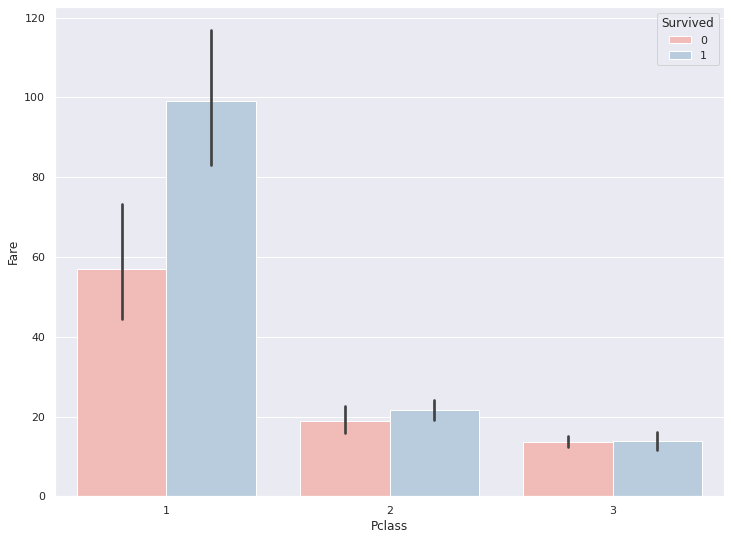

In [ ]:
#@title 클래스 별 요금
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme()

plt.rcParams['figure.figsize'] = (12, 9)
plt.rcParams['axes.unicode_minus'] = False

sns.barplot(x='Pclass', y='Fare', data=df, palette="Pastel1", hue="Survived")

plt.show()

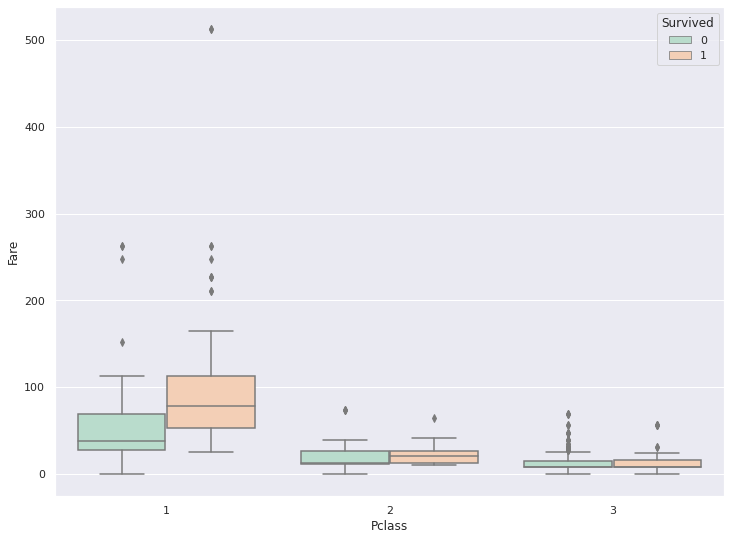

In [ ]:
#@title 객실 클래스 별 [사망자, 생존자]가 낸 요금
sns.set_theme()

plt.rcParams['figure.figsize'] = (12, 9)
plt.rcParams['axes.unicode_minus'] = False

sns.boxplot(x='Pclass', y='Fare', hue='Survived', data=df, palette="Pastel2")

plt.show()

#### 성별 단위 생존자 수

여자의 생존율이 남자보다 더 높다.

남자
- 생존 : 76
- 사망 : 323

여자
- 생존 : 163
- 사망 : 61

**결측값 없음**

In [ ]:
df.loc[df.Sex == "male", 'Survived'].value_counts()

0    323
1     76
Name: Survived, dtype: int64

In [ ]:
df.loc[df.Sex == "female", 'Survived'].value_counts()

1    163
0     61
Name: Survived, dtype: int64

### 변수 간 상관관계 확인

**[독립변수 간 상관관계를 보이는 변수]**
1.  Fare <=> Pclass : **-0.55**
2.  Sibsp <=> Parch :  0.41
3.  Pclass <=> Age : 0.37
4.  Age <=> Sibsp : -0.31
5.  Sex <=> Parch : -0.25

**[종속변수와 상관관계를 보이는 변수]**
1.  Sex <=> Survived : **-0.54**
2.  Pclass <=> Survived : -0.34
3.  Fare <=> Survived : 0.26


**[상관계수 범위 별 기준]**
- 절댓값이 1에 가까운 상관계수: **매우 확고한 상관.** 순수학문에 가까운 분야에서는 대부분 이 조건을 요구하나, 사회과학에서는 데이터 조작을 한 번쯤은 의심해봐야 하는 수준이다.
- 절댓값 0.5 정도의 상관계수: **강력한 상관.** 상관관계가 있다고 통계적으로 지지받을 수 있는 수준이다.
- 절댓값 0.2 정도의 상관계수: **미약한(모호한) 상관.** 상관관계가 있다고 장담할 수 없으며, 연구가 더 필요한 수준이나, 사회과학에서는 상관관계가 강력한 것으로 본다.
- 0에 가까운 상관계수 : **대부분의 경우, 상관관계가 없다고 본다.** 후속 연구를 통해 뒤집어질 수도 있지만 일단은 회의적이다. 한편, 2차 방정식 그래프와 비슷한 모양이 될 경우 상관관계는 있으나 상관계수는 0에 가깝게 나온다.


**[참고]**
- 독립성 검사 시
  - 귀무가설 : 두 변수는 독립이다.
  - 대립가설 : 두 변수는 독립이 아니다.

**[독립, 다중공선성 존재 여부]**

<br>

|변인1|변인2|독립 여부|다중공선성 존재여부|
|-|-|-|-|
|`SibSp`|`Parch`|x|x|
|`Pare`|`Pclass`|x|x|


In [ ]:
from sklearn.preprocessing import LabelEncoder

new_df = df.copy()
encoder = LabelEncoder()
new_df.Sex = encoder.fit_transform(new_df.Sex)
new_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
617,618,3,"Lobb, Mrs. William Arthur (Cordelia K Stanlick)",0,26.0,1,0,A/5. 3336,16.1000,NaN,S,0
739,740,3,"Nankoff, Mr. Minko",1,NaN,0,0,349218,7.8958,NaN,S,0
716,717,1,"Endres, Miss. Caroline Louise",0,38.0,0,0,PC 17757,227.5250,C45,C,1
83,84,1,"Carrau, Mr. Francisco M",1,28.0,0,0,113059,47.1000,NaN,S,0
210,211,3,"Ali, Mr. Ahmed",1,24.0,0,0,SOTON/O.Q. 3101311,7.0500,NaN,S,0


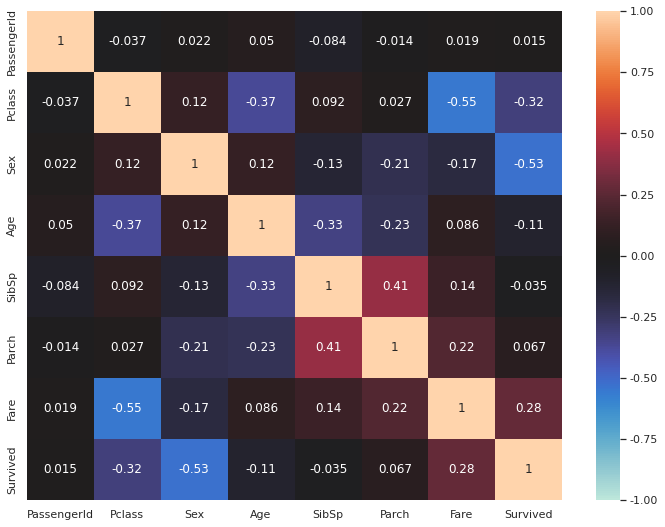

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['figure.figsize'] = (12, 9)

# coolwarm, icefire
sns.heatmap(new_df.corr(), annot=True, vmin=-1, vmax=1, cmap="icefire")
plt.show()

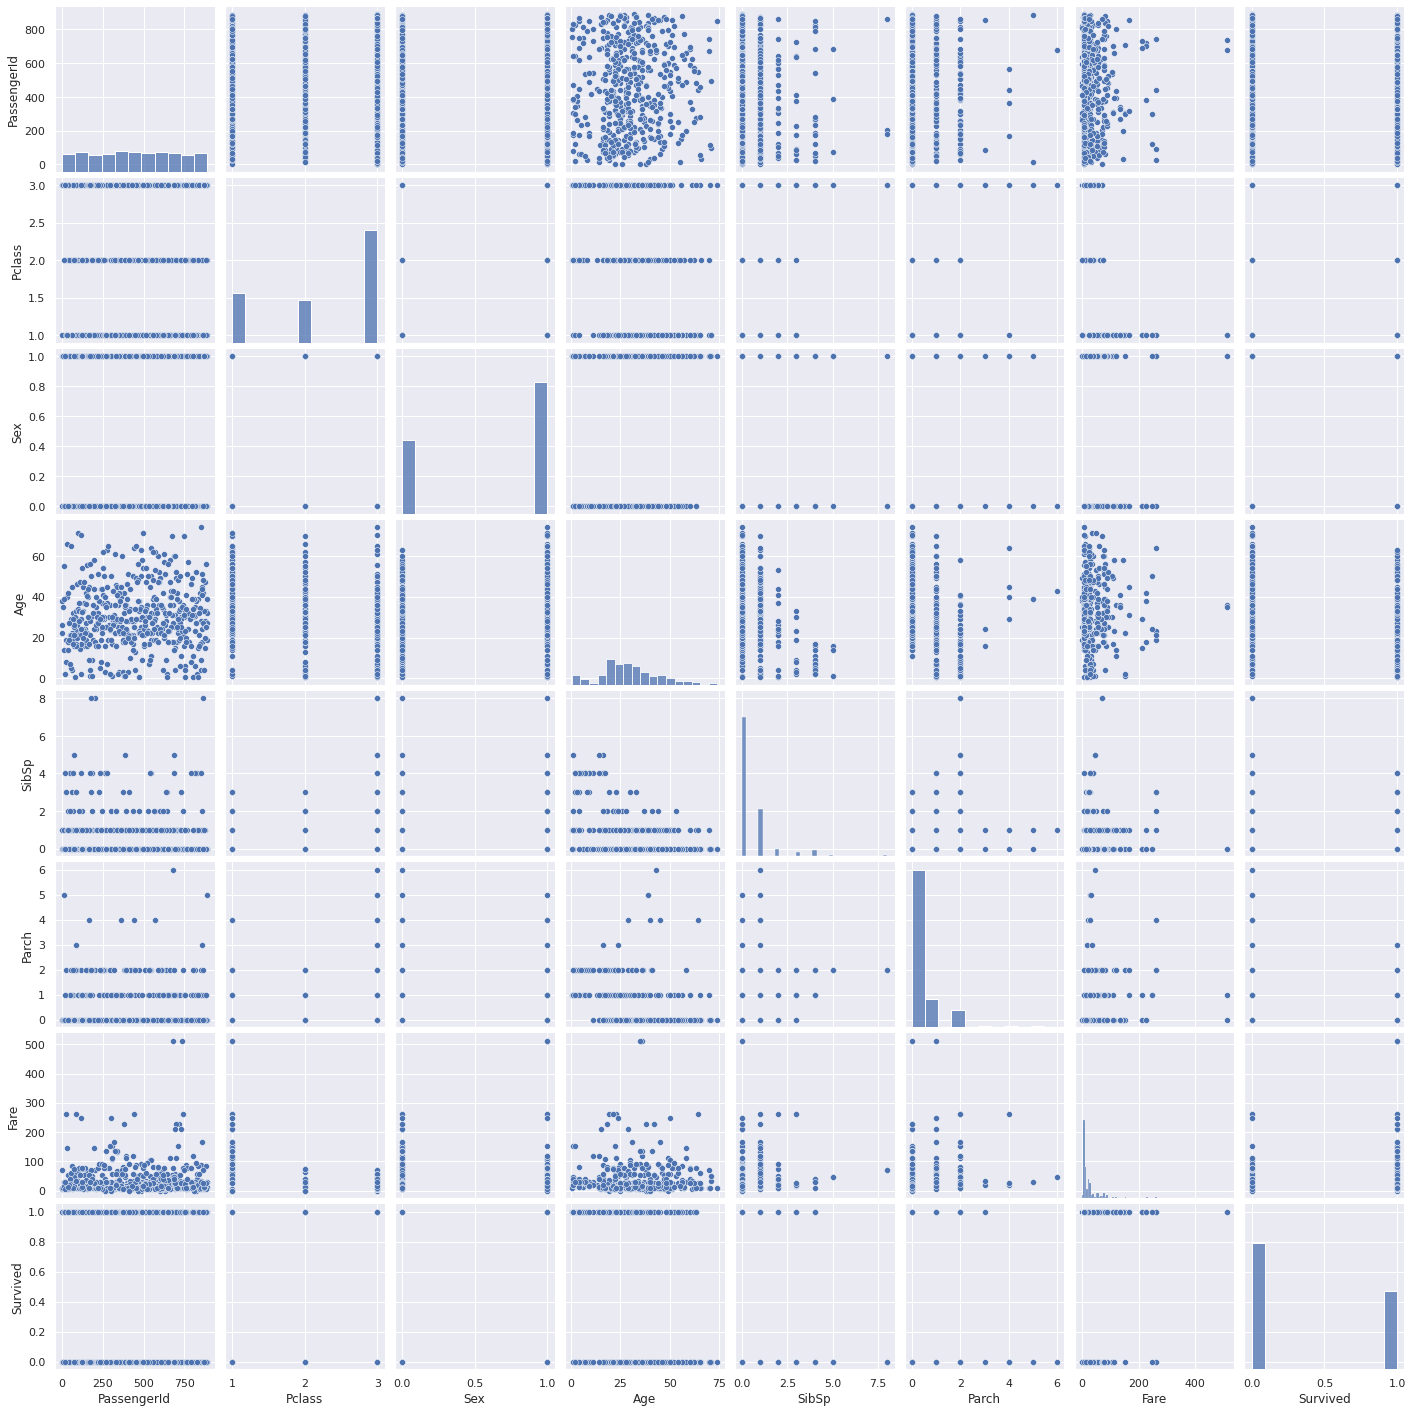

In [ ]:
plt.rcParams['figure.figsize'] = (12, 9)

sns.pairplot(data=new_df)

plt.show()

In [ ]:
df.isnull().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Cabin       0
Survived    0
C           0
Q           0
S           0
dtype: int64

In [ ]:
import statsmodels.formula.api as smi

# df.Age.fillna(np.mean(df.Age), inplace=True)
# df.Embarked.fillna('S', inplace=True)

result = smi.ols(formula="Survived ~ Pclass + Sex + Age + SibSp + Parch + Fare + Cabin + C + Q + S", data=df).fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:               Survived   R-squared:                       0.414
Model:                            OLS   Adj. R-squared:                  0.405
Method:                 Least Squares   F-statistic:                     48.12
Date:                Sun, 19 Mar 2023   Prob (F-statistic):           1.48e-65
Time:                        05:59:12   Log-Likelihood:                -268.33
No. Observations:                 623   AIC:                             556.7
Df Residuals:                     613   BIC:                             601.0
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.0696      0.070     15.304      0.0

In [ ]:
result = smi.ols(formula="Survived ~ Pclass + Sex + Age + SibSp + C + Q + S", data=df).fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:               Survived   R-squared:                       0.411
Model:                            OLS   Adj. R-squared:                  0.405
Method:                 Least Squares   F-statistic:                     71.53
Date:                Sun, 19 Mar 2023   Prob (F-statistic):           1.57e-67
Time:                        06:00:37   Log-Likelihood:                -270.14
No. Observations:                 623   AIC:                             554.3
Df Residuals:                     616   BIC:                             585.3
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.0257      0.056     18.397      0.0

#### Fare <=> Pclass 독립성 검정

카이제곱 검정 결과 : 두 변수 **'Fare', 'Pclass'는 독립이** 아니다.

추가적인 **다중공선성 검사가 필요**하다.

In [117]:
# 패키지 위치는 /usr/local/lib/python3.9/dist-packages
from scipy.stats.contingency import chi2_contingency

cross_tab = pd.crosstab(df['Pclass'], df['Fare'])
chi2, p, dof, expected = chi2_contingency(cross_tab)

print("chi2:", chi2)
print("p-value:", p)
print("degree of freedom:", dof)
# print("expected frequencies:\n", expected)

chi2: 1193.8889593397746
p-value: 1.2675647371347506e-72
degree of freedom: 432


#### Fare <=> Pclass 다중공선성 검사

다중공선성 검사 결과, VIF값이 약 1.155881로 매우 낮다.(10이하)

따라서, 두 변수 **'Fare', 'Pclass'사이에는 다중공선성이 존재하지 않는다**고 볼 수 있다.

그러니 회귀 분석 검사 결과가 왜곡될 걱정은 없다.


In [118]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

X = df[['Fare', 'Pclass']]
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns

vif

,VIF Factor,features
0,1.155881,Fare
1,1.155881,Pclass


#### Age <=> Pclass 독립성 검정

카이제곱 검정 결과 : 두 변수 'SibSp', 'Parch'는 독립이 아니다.

추가적으로, **다중공선성 검사가 필요**하다.

In [113]:
from scipy.stats import chi2_contingency

cross_tab = pd.crosstab(df['Age'], df['Pclass'])
chi2, p, dof, expected = chi2_contingency(cross_tab)

print("chi2:", chi2)
print("p-value:", p)
print("degree of freedom:", dof)
# print("expected frequencies:\n", expected)

chi2: 250.2902495203905
p-value: 2.4605752169657345e-06
degree of freedom: 156


#### Age <=> Pclass 다중공선성 검사

다중공선성 검사 결과, VIF값이 약 3.110504로 매우 낮다.(10이하)

따라서, 두 변수 **'SibSp', 'Parch'사이에는 다중공선성이 존재하지 않는다**고 볼 수 있다.


In [116]:
X = df[['Age', 'Pclass']]
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns

vif

,VIF Factor,features
0,3.110504,Age
1,3.110504,Pclass


#### 다중공선성 검사

In [123]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
# X = df[['Fare', 'Pclass']]
X = df.select_dtypes(exclude="object")
# X.drop(['S', 'Cabin'], axis=1, inplace=True)
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns

vif

,VIF Factor,features
0,1.008453,PassengerId
1,1.870727,Pclass
2,1.533098,Sex
3,1.252296,Age
4,1.271346,SibSp
5,1.311974,Parch
6,1.635043,Fare
7,1.653790,Survived
8,8.695980,C
9,5.817992,Q


In [ ]:
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S


### 'Age' column 결측값 탐색

1. 살아남지 못한 경우가 많았다. => (0 : 1 = 125 : 52)
2. 3 클래스 객실에 많이들 머물렀다. => (1 : 2 : 3 = 30 : 11 : 136)
3. 남자가 많았다. => (male : female = 124 : 53)
4. 요금의 평균은 22.15856666666667
5. 기항지는 S(영국 사우스 햄스턴)가 많았다. (S : Q : C = 90 : 49 : 39)
6. 같이 탑승한 형제자매나 배우자는 없는 경우가 많았다. [별첨 #1 참조.]
7. 같이 탑승한 부모나 자녀들은 없는 경우가 많았다. [별첨 #2 참조.]

결측값의 갯수 : 177개

<br>

**[별첨 #1]**

|형제자매나 배우자[SibSp]|합계|
|-|-|
|0|137|
|1|26|
|8|7|
|3|4|
|2|3|


**[별첨 #2]**

|부모 / 자녀 인원 수[Parch]|합계|
|-|-|
|0|157|
|2|12|
|1|8|




In [ ]:
df.loc[df.Age.isnull() == True, ]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
739,740,3,"Nankoff, Mr. Minko",male,NaN,0,0,349218,7.8958,NaN,S,0
295,296,1,"Lewy, Mr. Ervin G",male,NaN,0,0,PC 17612,27.7208,NaN,C,0
77,78,3,"Moutal, Mr. Rahamin Haim",male,NaN,0,0,374746,8.0500,NaN,S,0
457,458,1,"Kenyon, Mrs. Frederick R (Marion)",female,NaN,1,0,17464,51.8625,D21,S,1
832,833,3,"Saad, Mr. Amin",male,NaN,0,0,2671,7.2292,NaN,C,0
...,...,...,...,...,...,...,...,...,...,...,...,...
766,767,1,"Brewe, Dr. Arthur Jackson",male,NaN,0,0,112379,39.6000,NaN,C,0
533,534,3,"Peter, Mrs. Catherine (Catherine Rizk)",female,NaN,0,2,2668,22.3583,NaN,C,1
413,414,2,"Cunningham, Mr. Alfred Fleming",male,NaN,0,0,239853,0.0000,NaN,S,0
522,523,3,"Lahoud, Mr. Sarkis",male,NaN,0,0,2624,7.2250,NaN,C,0


In [ ]:
df.loc[df.Age.isnull() == True, 'Survived'].value_counts()

0    86
1    36
Name: Survived, dtype: int64

In [ ]:
df.loc[df.Age.isnull() == True, 'Pclass'].value_counts()

3    93
1    22
2     7
Name: Pclass, dtype: int64

In [ ]:
df.loc[df.Age.isnull() == True, 'Sex'].value_counts()

male      83
female    39
Name: Sex, dtype: int64

In [ ]:
df.loc[df.Age.isnull() == True, 'Fare'].mean()

20.574212295081967

In [ ]:
df.loc[df.Age.isnull() == True, 'Embarked'].value_counts()

S    61
C    31
Q    30
Name: Embarked, dtype: int64

In [ ]:
df.loc[df.Age.isnull() == True, 'SibSp'].value_counts()

0    96
1    17
8     3
3     3
2     3
Name: SibSp, dtype: int64

In [ ]:
df.loc[df.Age.isnull() == True, 'Parch'].value_counts()

0    111
1      6
2      5
Name: Parch, dtype: int64

In [ ]:
df.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age            122
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          481
Embarked         0
Survived         0
dtype: int64

In [ ]:
np.mean(df.Age)

29.822694610778445

#### Age column 결론


1. 살아남지 못한 경우가 많았다. => (0 : 1 = 125 : 52)
2. 3 클래스 객실에 많이들 머물렀다. => (1 : 2 : 3 = 30 : 11 : 136)
3. 남자가 많았다. => (male : female = 124 : 53)
4. 요금의 평균은 22.15856666666667
5. 기항지는 S(영국 사우스 햄스턴)가 많았다. (S : Q : C = 90 : 49 : 39)
6. **같이 탑승한 형재자매나 배우자는 없는 경우가 많았다.**
7. **같이 탑승한 부모나 자녀들은 없는 경우가 많았다.**

같이 탑승한 지인이 한 명도 없고 (AND 조건), 3클래스 객실에 머무른 남자 중 살아남지 못한 경우 (OR조건).

In [ ]:
cond_1 = df.loc[(df.SibSp == 0) & (df.Parch == 0)].index
cond_2 = df.loc[(df.Pclass == 3) | (df.Sex == "male") | (df.Survived == 0)].index
new_df = df.loc[cond_1 & cond_2]
new_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,32,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54,0,0,17463,51.8625,E46,S
12,13,0,3,"Saundercock, Mr. William Henry",male,20,0,0,A/5. 2151,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
883,884,0,2,"Banfield, Mr. Frederick James",male,28,0,0,C.A./SOTON 34068,10.5000,NaN,S
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25,0,0,SOTON/OQ 392076,7.0500,NaN,S
886,887,0,2,"Montvila, Rev. Juozas",male,27,0,0,211536,13.0000,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26,0,0,111369,30.0000,C148,C


In [ ]:
int(round(new_df.Age.mean(), 0))

32

In [ ]:
df.Age.fillna(int(round(new_df.Age.mean(), 0)), inplace=True)

In [ ]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

### 'Ticket' column 탐색

1. 돈(Fare)은 똑같이 다 내고 Ticket ID는 하나만 부여받는다.


Ticket column에 대한 중복값은 냅둬야 함.  => 전부 다른 사람이 맞음. (한 가족)

Embarked 결측치 2개 있는거 탐색하다가 Ticket column 중복값이 있다는 사실을 알게 됨.

In [ ]:
df.loc[df.Ticket.duplicated() == True]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
24,25,0,3,"Palsson, Miss. Torborg Danira",female,8.0,3,1,349909,21.0750,NaN,S
71,72,0,3,"Goodwin, Miss. Lillian Amy",female,16.0,5,2,CA 2144,46.9000,NaN,S
88,89,1,1,"Fortune, Miss. Mabel Helen",female,23.0,3,2,19950,263.0000,C23 C25 C27,S
117,118,0,2,"Turpin, Mr. William John Robert",male,29.0,1,0,11668,21.0000,NaN,S
119,120,0,3,"Andersson, Miss. Ellis Anna Maria",female,2.0,4,2,347082,31.2750,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
876,877,0,3,"Gustafsson, Mr. Alfred Ossian",male,20.0,0,0,7534,9.8458,NaN,S
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C50,C
880,881,1,2,"Shelley, Mrs. William (Imanita Parrish Hall)",female,25.0,0,1,230433,26.0000,NaN,S
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q


In [ ]:
df.loc[df.Ticket == "CA 2144"]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
59,60,0,3,"Goodwin, Master. William Frederick",male,11.0,5,2,CA 2144,46.9,NaN,S
71,72,0,3,"Goodwin, Miss. Lillian Amy",female,16.0,5,2,CA 2144,46.9,NaN,S
386,387,0,3,"Goodwin, Master. Sidney Leonard",male,1.0,5,2,CA 2144,46.9,NaN,S
480,481,0,3,"Goodwin, Master. Harold Victor",male,9.0,5,2,CA 2144,46.9,NaN,S
678,679,0,3,"Goodwin, Mrs. Frederick (Augusta Tyler)",female,43.0,1,6,CA 2144,46.9,NaN,S
683,684,0,3,"Goodwin, Mr. Charles Edward",male,14.0,5,2,CA 2144,46.9,NaN,S


In [ ]:
df.loc[df.Name.str.contains('Goodwin')]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
59,60,0,3,"Goodwin, Master. William Frederick",male,11.0,5,2,CA 2144,46.9,NaN,S
71,72,0,3,"Goodwin, Miss. Lillian Amy",female,16.0,5,2,CA 2144,46.9,NaN,S
386,387,0,3,"Goodwin, Master. Sidney Leonard",male,1.0,5,2,CA 2144,46.9,NaN,S
480,481,0,3,"Goodwin, Master. Harold Victor",male,9.0,5,2,CA 2144,46.9,NaN,S
678,679,0,3,"Goodwin, Mrs. Frederick (Augusta Tyler)",female,43.0,1,6,CA 2144,46.9,NaN,S
683,684,0,3,"Goodwin, Mr. Charles Edward",male,14.0,5,2,CA 2144,46.9,NaN,S


### Cabin(객실 번호) 탐색

**Cabin** column을 인코딩하고, 상관분석 / 다중공선성 분석을 각각 진행함.

※ 인코딩 방식 : 객실 번호의 맨 앞자리 알파벳을 기준으로 알파벳이 같은 객실 번호들을 알파벳 한 개로 통일하고, 사이킷런의 LabelEncoding을 사용하여 정수화.

<br>

**[상관분석]**

**Cabin** <=> **Pclass** 열의 상관계수가 무려 **0.75**로 매우 강력한 상관관계가 드러남. [아래의 heatmap 참조]

추가적인, **다중공선성 검사가 필요**함.

<br>

**[다중공선성 검사]**

|E.N.|Feature|VIF|
|-|-|-|
|1|Survived|1.647598|
|2|**Pclass**|**18.270335**|
|3|Age|4.615293|
|4|SibSp|1.567934|
|5|Parch|1.882757|
|6|Fare|3.697076|
|7|**Cabin**|**18.425351**|

**Pclass**와 **Cabin**의 분산팽창요인(VIF)이 기준점인 10을 넘는 **18.27**과 **18.43**을 기록하여, **다중공선성이 존재**하는 것으로 확인됨.

해석적인 측면에서, **Pclass**와 **Cabin** 둘 중에 하나를 없앨 것이 권장됨. => Cabin column 삭제.

다만, 다중공선성이 존재하는 feature를 삭제하는 것이 무조건적으로 분류기의 성능 향상으로 이어지지는 않음. 따라서, 다중공선성 feature 삭제는 성능 평가를 내보고 결정.

In [ ]:
df.Cabin.value_counts()

B96 B98        4
G6             4
C23 C25 C27    4
C22 C26        3
F33            3
              ..
E34            1
C7             1
C54            1
E36            1
C148           1
Name: Cabin, Length: 147, dtype: int64

In [100]:
import numpy as np

def unify_cabin(x):
    result = ""
    if type(x) == float:
        return np.nan
    result = x[0]
    return result

In [101]:
df_copy = df.copy()
df_copy.Cabin = df.Cabin.apply(unify_cabin)
cabin_columns = df_copy.Cabin.unique()

In [102]:
df_copy.Cabin.value_counts()

C    38
B    30
D    27
E    25
A    12
F     6
G     3
T     1
Name: Cabin, dtype: int64

#### 원핫인코딩

In [104]:
pd.get_dummies(df_copy.Cabin)

,A,B,C,D,E,F,G,T
759,0,1,0,0,0,0,0,0
732,0,0,0,0,0,0,0,0
145,0,0,0,0,0,0,0,0
77,0,0,0,0,0,0,0,0
442,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...
374,0,0,0,0,0,0,0,0
776,0,0,0,0,0,1,0,0
288,0,0,0,0,0,0,0,0
284,1,0,0,0,0,0,0,0


In [ ]:
df_copy.Cabin.value_counts()

7    481
2     37
1     35
3     25
4     23
5     11
0     10
6      1
Name: Cabin, dtype: int64

In [ ]:
df.loc[df.Cabin.str.contains("T") == True]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived


In [ ]:
np.mean(df.loc[df.Pclass == 1, 'Fare'])

82.73105789473685

In [ ]:
for cabin in df.Cabin.values:
    if len(str(cabin)) >= 5:
        print(cabin)

D10 D12
C23 C25 C27
F E69
C23 C25 C27
B51 B53 B55
C23 C25 C27
C22 C26
B51 B53 B55
B57 B59 B63 B66
C62 C64
B96 B98
F G63
F G73
C22 C26
B96 B98
F G73
B58 B60
B58 B60
B82 B84
B96 B98


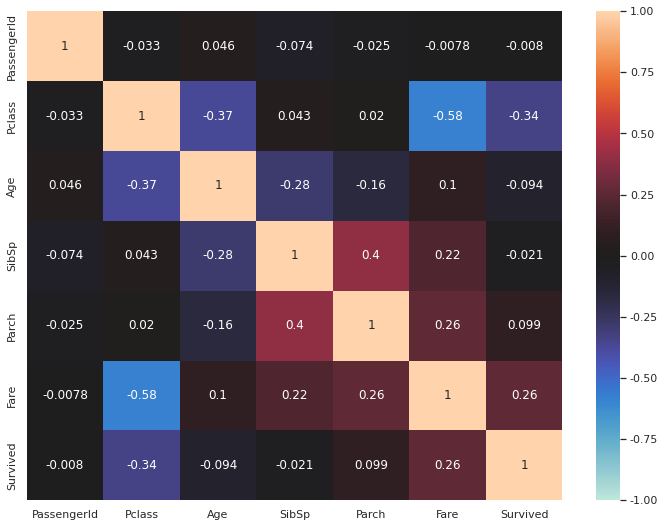

In [105]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams["axes.unicode_minus"] = False
plt.rcParams["figure.figsize"] = (12, 9)

sns.set_theme()
sns.heatmap(df_copy.select_dtypes(exclude='object').corr(), annot=True, vmin=-1, vmax=1, cmap="icefire")

plt.show()

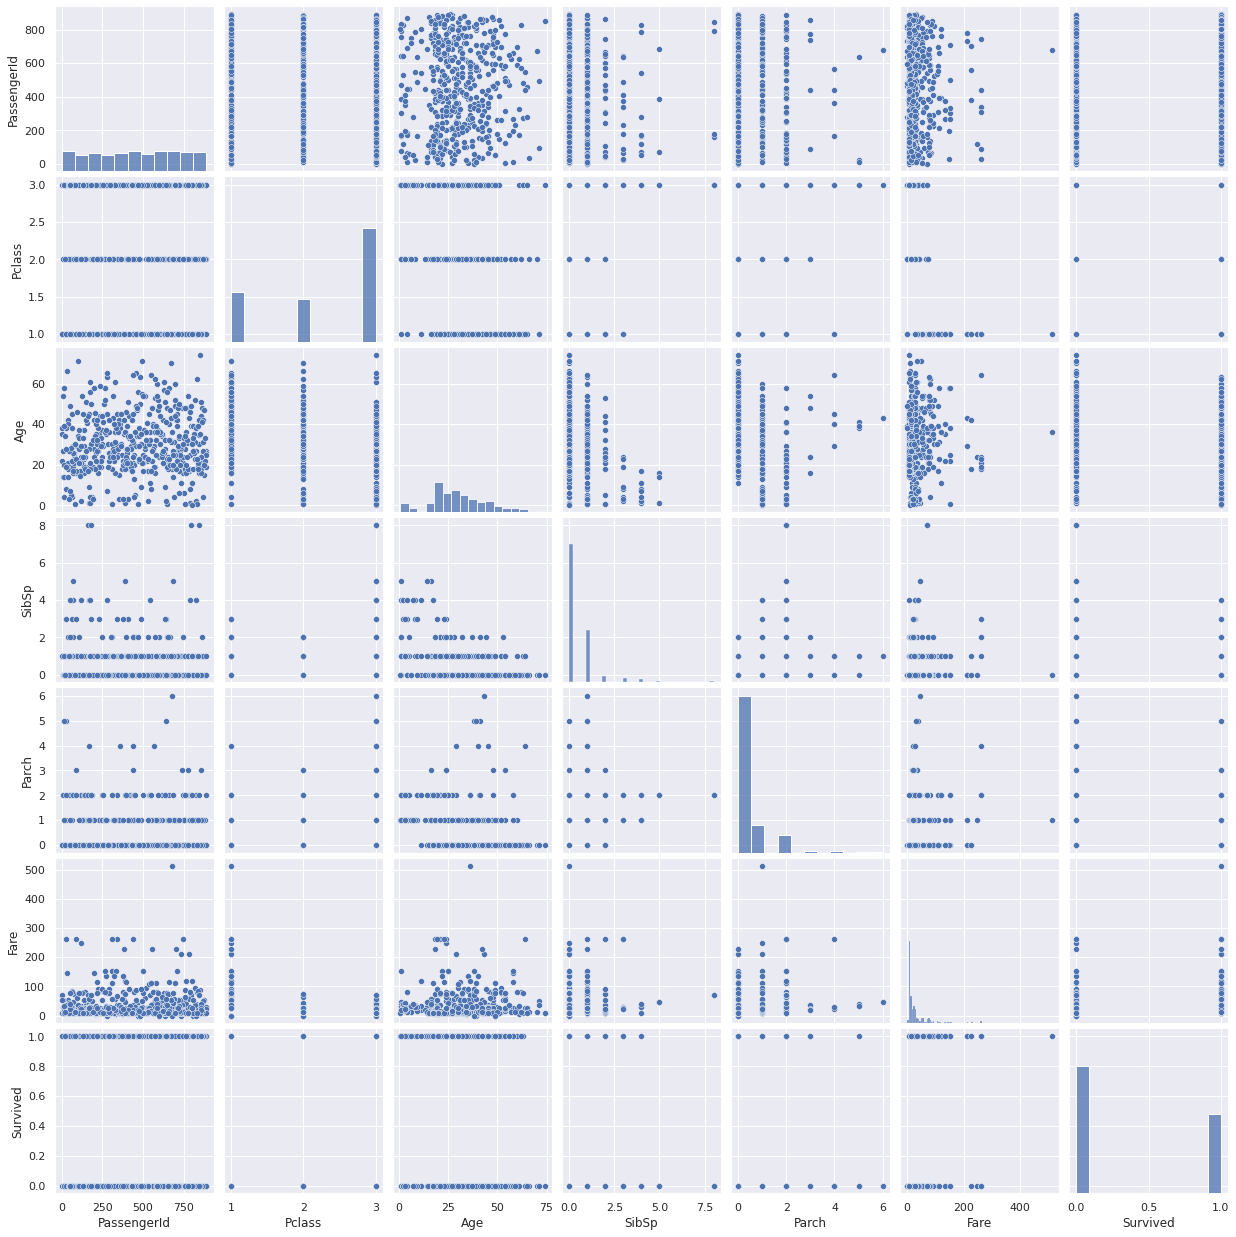

In [106]:
sns.pairplot(data=df_copy)

plt.show()

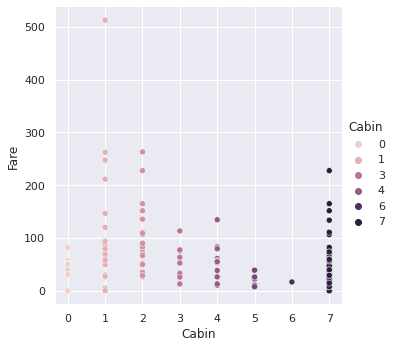

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.relplot(data=df_copy, x="Cabin", y="Fare", hue="Cabin")

plt.show()

### Embarked 탐색

In [ ]:
df.loc[df.Embarked.isnull() == True]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


In [ ]:
df.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

#### 원핫 인코딩

In [ ]:
pd.get_dummies(df.Embarked)

,C,Q,S
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1
...,...,...,...
886,0,0,1
887,0,0,1
888,0,0,1
889,1,0,0


### Name column 탐색

In [84]:
df

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
239,240,2,"Hunt, Mr. George Henry",male,33.0,0,0,SCO/W 1585,12.2750,NaN,S,0
237,238,2,"Collyer, Miss. Marjorie ""Lottie""",female,8.0,0,2,C.A. 31921,26.2500,NaN,S,1
376,377,3,"Landergren, Miss. Aurora Adelia",female,22.0,0,0,C 7077,7.2500,NaN,S,1
204,205,3,"Cohen, Mr. Gurshon ""Gus""",male,18.0,0,0,A/5 3540,8.0500,NaN,S,1
198,199,3,"Madigan, Miss. Margaret ""Maggie""",female,NaN,0,0,370370,7.7500,NaN,Q,1
...,...,...,...,...,...,...,...,...,...,...,...,...
804,805,3,"Hedman, Mr. Oskar Arvid",male,27.0,0,0,347089,6.9750,NaN,S,1
428,429,3,"Flynn, Mr. James",male,NaN,0,0,364851,7.7500,NaN,Q,0
138,139,3,"Osen, Mr. Olaf Elon",male,16.0,0,0,7534,9.2167,NaN,S,0
573,574,3,"Kelly, Miss. Mary",female,NaN,0,0,14312,7.7500,NaN,Q,1


In [85]:
df.Name.value_counts()

Hunt, Mr. George Henry                             1
Moen, Mr. Sigurd Hansen                            1
Baxter, Mrs. James (Helene DeLaudeniere Chaput)    1
Green, Mr. George Henry                            1
Lefebre, Miss. Ida                                 1
                                                  ..
Dahl, Mr. Karl Edwart                              1
Petterson, Mr. Johan Emil                          1
Hanna, Mr. Mansour                                 1
Roebling, Mr. Washington Augustus II               1
Lehmann, Miss. Bertha                              1
Name: Name, Length: 623, dtype: int64

In [86]:
new_df = df.loc[(df.SibSp >= 1) | (df.Parch >= 1)]
new_df

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
237,238,2,"Collyer, Miss. Marjorie ""Lottie""",female,8.0,0,2,C.A. 31921,26.2500,NaN,S,1
556,557,1,"Duff Gordon, Lady. (Lucille Christiana Sutherl...",female,48.0,1,0,11755,39.6000,A16,C,1
215,216,1,"Newell, Miss. Madeleine",female,31.0,1,0,35273,113.2750,D36,C,1
679,680,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C,1
704,705,3,"Hansen, Mr. Henrik Juul",male,26.0,1,0,350025,7.8542,NaN,S,0
...,...,...,...,...,...,...,...,...,...,...,...,...
268,269,1,"Graham, Mrs. William Thompson (Edith Junkins)",female,58.0,0,1,PC 17582,153.4625,C125,S,1
684,685,2,"Brown, Mr. Thomas William Solomon",male,60.0,1,1,29750,39.0000,NaN,S,0
700,701,1,"Astor, Mrs. John Jacob (Madeleine Talmadge Force)",female,18.0,1,0,PC 17757,227.5250,C62 C64,C,1
860,861,3,"Hansen, Mr. Claus Peter",male,41.0,2,0,350026,14.1083,NaN,S,0


In [87]:
new_df.loc[new_df.Name.str.contains("Collyer")]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
237,238,2,"Collyer, Miss. Marjorie ""Lottie""",female,8.0,0,2,C.A. 31921,26.25,NaN,S,1
801,802,2,"Collyer, Mrs. Harvey (Charlotte Annie Tate)",female,31.0,1,1,C.A. 31921,26.25,NaN,S,1


In [88]:
def convert_name(name:str) -> str:
    return name.split()[0]

In [91]:
convert_name(new_df.loc[801,"Name"])

'Collyer,'

In [92]:
new_df.Name = new_df.Name.apply(convert_name)
new_df

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
237,238,2,"Collyer,",female,8.0,0,2,C.A. 31921,26.2500,NaN,S,1
556,557,1,Duff,female,48.0,1,0,11755,39.6000,A16,C,1
215,216,1,"Newell,",female,31.0,1,0,35273,113.2750,D36,C,1
679,680,1,"Cardeza,",male,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C,1
704,705,3,"Hansen,",male,26.0,1,0,350025,7.8542,NaN,S,0
...,...,...,...,...,...,...,...,...,...,...,...,...
268,269,1,"Graham,",female,58.0,0,1,PC 17582,153.4625,C125,S,1
684,685,2,"Brown,",male,60.0,1,1,29750,39.0000,NaN,S,0
700,701,1,"Astor,",female,18.0,1,0,PC 17757,227.5250,C62 C64,C,1
860,861,3,"Hansen,",male,41.0,2,0,350026,14.1083,NaN,S,0


In [93]:
df.drop(new_df.index, axis=0, inplace=True)
df

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
239,240,2,"Hunt, Mr. George Henry",male,33.0,0,0,SCO/W 1585,12.2750,NaN,S,0
376,377,3,"Landergren, Miss. Aurora Adelia",female,22.0,0,0,C 7077,7.2500,NaN,S,1
204,205,3,"Cohen, Mr. Gurshon ""Gus""",male,18.0,0,0,A/5 3540,8.0500,NaN,S,1
198,199,3,"Madigan, Miss. Margaret ""Maggie""",female,NaN,0,0,370370,7.7500,NaN,Q,1
734,735,2,"Troupiansky, Mr. Moses Aaron",male,23.0,0,0,233639,13.0000,NaN,S,0
...,...,...,...,...,...,...,...,...,...,...,...,...
804,805,3,"Hedman, Mr. Oskar Arvid",male,27.0,0,0,347089,6.9750,NaN,S,1
428,429,3,"Flynn, Mr. James",male,NaN,0,0,364851,7.7500,NaN,Q,0
138,139,3,"Osen, Mr. Olaf Elon",male,16.0,0,0,7534,9.2167,NaN,S,0
573,574,3,"Kelly, Miss. Mary",female,NaN,0,0,14312,7.7500,NaN,Q,1


In [94]:
df = df.append(new_df)
df

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
239,240,2,"Hunt, Mr. George Henry",male,33.0,0,0,SCO/W 1585,12.2750,NaN,S,0
376,377,3,"Landergren, Miss. Aurora Adelia",female,22.0,0,0,C 7077,7.2500,NaN,S,1
204,205,3,"Cohen, Mr. Gurshon ""Gus""",male,18.0,0,0,A/5 3540,8.0500,NaN,S,1
198,199,3,"Madigan, Miss. Margaret ""Maggie""",female,NaN,0,0,370370,7.7500,NaN,Q,1
734,735,2,"Troupiansky, Mr. Moses Aaron",male,23.0,0,0,233639,13.0000,NaN,S,0
...,...,...,...,...,...,...,...,...,...,...,...,...
268,269,1,"Graham,",female,58.0,0,1,PC 17582,153.4625,C125,S,1
684,685,2,"Brown,",male,60.0,1,1,29750,39.0000,NaN,S,0
700,701,1,"Astor,",female,18.0,1,0,PC 17757,227.5250,C62 C64,C,1
860,861,3,"Hansen,",male,41.0,2,0,350026,14.1083,NaN,S,0


In [95]:
df.Name.value_counts()

Sage,                            7
Andersson,                       6
Rice,                            5
Carter,                          5
Fortune,                         4
                                ..
O'Connor, Mr. Maurice            1
Sawyer, Mr. Frederick Charles    1
Asim, Mr. Adola                  1
Andrew, Mr. Edgardo Samuel       1
Astor,                           1
Name: Name, Length: 529, dtype: int64

In [97]:
from sklearn.preprocessing import LabelEncoder

def convert_name(name:str) -> str:
    return name.split()[0]

new_df = df.loc[(df.SibSp >= 1) | (df.Parch >= 1)]
new_df.Name = new_df.Name.apply(convert_name)
df.drop(new_df.index, axis=0, inplace=True)
df = df.append(new_df)

encoder = LabelEncoder()
df.Name = encoder.fit_transform(df['Name'])
df

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
135,136,2,394,male,23.0,0,0,SC/PARIS 2133,15.0458,NaN,C,0
705,706,2,316,male,39.0,0,0,250655,26.0000,NaN,S,0
575,576,3,365,male,19.0,0,0,358585,14.5000,NaN,S,0
601,602,3,441,male,NaN,0,0,349214,7.8958,NaN,S,0
633,634,1,361,male,NaN,0,0,112052,0.0000,NaN,S,0
...,...,...,...,...,...,...,...,...,...,...,...,...
409,410,3,258,female,NaN,3,1,4133,25.4667,NaN,S,0
111,112,3,521,female,14.5,1,0,2665,14.4542,NaN,C,0
403,404,3,167,male,28.0,1,0,STON/O2. 3101279,15.8500,NaN,S,0
874,875,2,2,female,28.0,1,0,P/PP 3381,24.0000,NaN,C,1


In [98]:
df.Name.value_counts()

414    6
157    6
14     5
359    5
440    4
      ..
104    1
437    1
147    1
102    1
226    1
Name: Name, Length: 527, dtype: int64

In [ ]:
ticket_list = []

for ticket in df.Ticket.tolist():
    if df.loc[df.Ticket.str.contains(ticket)].shape[0] >= 2:
        ticket_list.append(ticket)


ticket_list[:10]

['113803',
 '349909',
 '347742',
 '237736',
 'PP 9549',
 '347082',
 '382652',
 '2649',
 '239865',
 '349909']

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.075,NaN,S
24,25,0,3,"Palsson, Miss. Torborg Danira",female,8.0,3,1,349909,21.075,NaN,S
374,375,0,3,"Palsson, Miss. Stina Viola",female,3.0,3,1,349909,21.075,NaN,S
567,568,0,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.075,NaN,S


### 이상치 탐색

- 모든 열의 평균이 대략 0.4 ~ 50 정도에 위치하지만, 최댓값(max)은 Age, Fare column이 각각 80, 512.33으로 높은 수치를 기록함. => 이상치.
- 나이와 요금은 데이터를 잘못 집계한게 아닌 이상 잘못된 값이 들어설 가능성은 없음.
- 이상치를 삭제하지 않고 데이터에 반영할 것을 권장.
- 대신, 해당 이상치들이 분석 결과를 왜곡시킨다는 점은 변함이 없으므로, 알고리즘 선택 시 이상치에 강건한(Robust) 모델 선택이 필요.


In [ ]:
df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,30.140292,0.523008,0.381594,32.204208
std,0.486592,0.836071,13.043896,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,32.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
?np.percentile

In [ ]:
import numpy as np

percent = np.percentile(df.Fare.values, 95)

df.loc[df.Fare >= percent].sort_values(by="Fare")

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
659,660,0,1,"Newell, Mr. Arthur Webster",male,58.00,0,2,35273,113.2750,D48,C
393,394,1,1,"Newell, Miss. Marjorie",female,23.00,1,0,35273,113.2750,D36,C
215,216,1,1,"Newell, Miss. Madeleine",female,31.00,1,0,35273,113.2750,D36,C
435,436,1,1,"Carter, Miss. Lucile Polk",female,14.00,1,2,113760,120.0000,B96 B98,S
763,764,1,1,"Carter, Mrs. William Ernest (Lucile Polk)",female,36.00,1,2,113760,120.0000,B96 B98,S
390,391,1,1,"Carter, Mr. William Ernest",male,36.00,1,2,113760,120.0000,B96 B98,S
802,803,1,1,"Carter, Master. William Thornton II",male,11.00,1,2,113760,120.0000,B96 B98,S
660,661,1,1,"Frauenthal, Dr. Henry William",male,50.00,2,0,PC 17611,133.6500,NaN,S
334,335,1,1,"Frauenthal, Mrs. Henry William (Clara Heinshei...",female,NaN,1,0,PC 17611,133.6500,NaN,S
337,338,1,1,"Burns, Miss. Elizabeth Margaret",female,41.00,0,0,16966,134.5000,E40,C


### 클래스 불균형 문제

In [ ]:
df.Survived.value_counts()

0    549
1    342
Name: Survived, dtype: int64

### EDA 소결

**[전처리 필요 여부]**

|Feature|처리 여부|처리 방법|사유|
|-|-|-|-|
|PassengerId|O|drop|index는 학습에 하등 도움 안됨|
|Survived|O|Oversampling / Undersampling|클래스 불균형 문제|
|Pclass|X|-|-|
|Name|O|drop|이름은 전부 다르기에, 도움 안됨|
|Sex|O|LabelEncoding|Object column 처리|
|Age|O|fillna|Age column EDA로 도출된 결과로 결측값 대체|
|SibSp|X|-|-|
|Parch|검증필요|drop|회귀분석 결과 P-Value 초과|
|Ticket|O|drop|클래스의 개수가 무수히 많아 encoding 불가|
|Fare|검증필요|drop|회귀분석 결과 P-Value 초과|
|Cabin|검증 필요|drop or Encoding|다중공선성 존재|
|Embarked|O|One-hot Encoding|잘못된 학습 방지|

<br>

- 다수의 column에서 강력한 상관관계가 보임. => 다중공선성 검증 필요
- 이상치가 존재하나, 정상적인 데이터로 간주하여 훈련 데이터에 반영.

=> 이상치에 강건하고(Robust), 과적합에 강하고, 알고리즘 선정.

=> 특히 Cabin column 미삭제 시, 다중공선성에 취약한 알고리즘(예시 : 회귀 알고리즘)은 피해서 알고리즘 모델을 선택한다.


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 534 entries, 727 to 823
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    534 non-null    int64  
 1   Name      534 non-null    object 
 2   Sex       534 non-null    object 
 3   Age       534 non-null    int64  
 4   SibSp     534 non-null    int64  
 5   Parch     534 non-null    int64  
 6   Ticket    534 non-null    object 
 7   Fare      534 non-null    float64
 8   Embarked  534 non-null    object 
 9   Survived  534 non-null    int64  
dtypes: float64(1), int64(5), object(4)
memory usage: 62.1+ KB


In [ ]:

new_df

,Pclass,Sex,Age,SibSp,Parch,Fare,Survived,C,Q,S
184,3,0,4,0,2,22.0250,1,0,0,1
247,2,0,24,0,2,14.5000,1,0,0,1
880,2,0,25,0,1,26.0000,1,0,0,1
553,3,1,22,0,0,7.2250,1,1,0,0
612,3,0,32,1,0,15.5000,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...
578,3,0,32,1,0,14.4583,0,1,0,0
46,3,1,32,1,0,15.5000,0,0,1,0
82,3,0,32,0,0,7.7875,1,0,1,0
349,3,1,42,0,0,8.6625,0,0,0,1


<br>

## 2. Train - Test split (비율을 7:3 으로 유지해주시고, seed는 0을 적용해주세요)

In [ ]:
from sklearn.model_selection import train_test_split

import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/도원결의 시즌2/dowon/도원/titanic.csv', encoding='utf-8', engine='python')

x_train, x_test, y_train, y_test = train_test_split(
    df.drop(['Survived'], axis=1),
    df['Survived'],
    test_size=0.2, shuffle=True, stratify=df['Survived']
)

# train 데이터 셋에 대한 df => Age에 결측값에 mean()으로 채워넣기 위한 빌드업
df = pd.concat([x_train, y_train], axis=1)
df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
541,542,3,"Andersson, Miss. Ingeborg Constanzia",female,9.0,4,2,347082,31.2750,NaN,S,0
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0
43,44,2,"Laroche, Miss. Simonne Marie Anne Andree",female,3.0,1,2,SC/Paris 2123,41.5792,NaN,C,1
317,318,2,"Moraweck, Dr. Ernest",male,54.0,0,0,29011,14.0000,NaN,S,0
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0


In [ ]:
x_train.shape

(623, 11)

In [ ]:
x_test.shape

(268, 11)

In [ ]:
y_train.shape

(623,)

In [ ]:
y_test.shape

(268,)

### train 데이터 처리

In [ ]:
from sklearn.preprocessing import LabelEncoder

import math
import warnings

warnings.filterwarnings("ignore")

## object column 4가지['PassengerId', 'Ticket', 'Name', 'Cabin'] 제거
df.drop(['PassengerId', 'Ticket', 'Name', 'Cabin',], axis=1, inplace=True)

## Sex column 처리
encoder = LabelEncoder()
df.Sex = encoder.fit_transform(df.Sex)

## Age column 결측값 채우기
cond_1 = df.loc[(df.SibSp == 0) & (df.Parch == 0)].index
cond_2 = df.loc[(df.Pclass == 3) | (df.Sex == "male") | (df.Survived == 0)].index
new_df = df.loc[cond_1 & cond_2]
df.Age.fillna(int(round(new_df.Age.mean(), 0)), inplace=True)
df.loc[df.Age % 1 != 0, "Age"] = df.loc[df.Age % 1 != 0, "Age"].apply(math.floor)
df.Age = df.Age.astype(int)

## Embarked column 처리 [결측값, 원핫인코딩]
df.Embarked.fillna("S", inplace=True)
df = pd.concat([df, pd.get_dummies(df.Embarked)], axis=1)
df.drop(['Embarked'], axis=1, inplace=True)


### test 데이터 처리

In [ ]:
# test 데이터 처리
## object column 4가지['PassengerId', 'Ticket', 'Name', 'Cabin'] 제거
x_test.drop(['PassengerId', 'Ticket', 'Name', 'Cabin',], axis=1, inplace=True)

## Sex column 처리
encoder = LabelEncoder()
x_test.Sex = encoder.fit_transform(x_test.Sex)

## Age column 결측값 채우기
cond_1 = df.loc[(df.SibSp == 0) & (df.Parch == 0)].index
cond_2 = df.loc[(df.Pclass == 3) | (df.Sex == "male") | (df.Survived == 0)].index
new_df = df.loc[cond_1 & cond_2]

x_test.Age.fillna(int(round(new_df.Age.mean(), 0)), inplace=True)
x_test.loc[x_test.Age % 1 != 0, "Age"] = x_test.loc[x_test.Age % 1 != 0, "Age"].apply(math.floor)
x_test.Age = x_test.Age.astype(int)

## Embarked column 처리 [결측값, 원핫인코딩]
x_test.Embarked.fillna("S", inplace=True)
x_test = pd.concat([x_test, pd.get_dummies(x_test.Embarked)], axis=1)
x_test.drop(['Embarked'], axis=1, inplace=True)

In [ ]:
x_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 179 entries, 649 to 698
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Pclass  179 non-null    int64  
 1   Sex     179 non-null    int64  
 2   Age     179 non-null    int64  
 3   SibSp   179 non-null    int64  
 4   Parch   179 non-null    int64  
 5   Fare    179 non-null    float64
 6   C       179 non-null    uint8  
 7   Q       179 non-null    uint8  
 8   S       179 non-null    uint8  
dtypes: float64(1), int64(5), uint8(3)
memory usage: 10.3 KB


In [ ]:
from imblearn.over_sampling import SMOTE

x_train = df.drop(['Survived'], axis=1)
y_train = df[['Survived']]

smote = SMOTE(random_state=42) # SMOTE 객체 생성

# 그냥 전처리가 아니라 단순히 SMOTE 기법을 시도하는 것이기 때문에 그냥 다버리고 오버샘플링 한번 보자.
x_train_over, y_train_over = smote.fit_resample(x_train, y_train)

pd.DataFrame(y_train_over).Survived.value_counts() # SMOTE 를 활용한 오버샘플링 적용된 것 확인

0    439
1    439
Name: Survived, dtype: int64

<br>

## 3. Create model instance variable (동시에 여러 모델을 다른 이름으로 만들 수 있습니다.)

### Phase 1. Parch, Fare, Cabin column 포함

#### 데이터 셋 생성

In [120]:
from sklearn.model_selection import train_test_split

import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/도원결의 시즌2/dowon/도원/titanic.csv', encoding='utf-8', engine='python')

x_train, x_test, y_train, y_test = train_test_split(
    df.drop(['Survived'], axis=1),
    df['Survived'],
    test_size=0.3, shuffle=True, stratify=df['Survived']
)

# train 데이터 셋에 대한 df => Age에 결측값에 mean()으로 채워넣기 위한 빌드업
df = pd.concat([x_train, y_train], axis=1)
df_test = pd.concat([x_test, y_test], axis=1)
df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
334,335,1,"Frauenthal, Mrs. Henry William (Clara Heinshei...",female,NaN,1,0,PC 17611,133.65,NaN,S,1
257,258,1,"Cherry, Miss. Gladys",female,30.0,0,0,110152,86.50,B77,S,1
626,627,2,"Kirkland, Rev. Charles Leonard",male,57.0,0,0,219533,12.35,NaN,Q,0
488,489,3,"Somerton, Mr. Francis William",male,30.0,0,0,A.5. 18509,8.05,NaN,S,0
368,369,3,"Jermyn, Miss. Annie",female,NaN,0,0,14313,7.75,NaN,Q,1


In [121]:
import numpy as np

def unify_cabin(x):
    result = ""
    if type(x) == float:
        return np.nan
    result = x[0]
    return result


def convert_name(name:str) -> str:
    return name.split()[0]


def find_missing_elements(arr1, arr2):
    missing_elements = []
    for element in arr1:
        if element not in arr2:
            missing_elements.append(element)
    return missing_elements

In [ ]:
from sklearn.preprocessing import LabelEncoder

df.Cabin = df.Cabin.apply(unify_cabin)
encoder = LabelEncoder()
df.Cabin = encoder.fit_transform(df.Cabin)

df_test.Cabin = df_test.Cabin.apply(unify_cabin)
encoder = LabelEncoder()
df_test.Cabin = encoder.fit_transform(df_test.Cabin)

# Cabin 원핫인코딩 안하는 이유 : 객실 알파벳에 따라 분류하면 8개 클래스가 나옴.
# 젤 적게 나오는 클래스인 8번 클래스가 한참 이전의 train_test_split 과정에서 균등하게 분리되지를 않음. => x_train과 x_test 데이터 셋 column 갯수가 달라짐.

# one_hot = pd.get_dummies(df.Cabin)
# one_hot_column_1 = list(map(str, one_hot.columns.tolist()))
# one_hot.columns = one_hot_column_1
# df = pd.concat([df, one_hot], axis=1)

# one_hot = pd.get_dummies(df_test.Cabin)
# one_hot_column_2 = list(map(str, one_hot.columns.tolist()))
# one_hot.columns = one_hot_column_2
# df_test = pd.concat([df_test, one_hot], axis=1)

# df.drop(find_missing_elements(df.columns, df_test.columns), axis=1, inplace=True)

In [122]:
from sklearn.preprocessing import LabelEncoder

import math
import warnings

warnings.filterwarnings("ignore")

# train 데이터 처리
## Sex column 처리
encoder = LabelEncoder()
df.Sex = encoder.fit_transform(df.Sex)

## Age column 결측값 채우기
cond_1 = df.loc[(df.SibSp == 0) & (df.Parch == 0)].index
cond_2 = df.loc[(df.Pclass == 3) | (df.Sex == "male") | (df.Survived == 0)].index
new_df = df.loc[cond_1 & cond_2]
df.Age.fillna(int(round(new_df.Age.mean(), 0)), inplace=True)
df.loc[df.Age % 1 != 0, "Age"] = df.loc[df.Age % 1 != 0, "Age"].apply(math.floor)
df.Age = df.Age.astype(int)

## Embarked column 처리 [결측값, 원핫인코딩]
df.Embarked.fillna("S", inplace=True)
df = pd.concat([df, pd.get_dummies(df.Embarked)], axis=1)
df.drop(['Embarked'], axis=1, inplace=True)

In [ ]:
# test 데이터 처리
## Sex column 처리
encoder = LabelEncoder()
df_test.Sex = encoder.fit_transform(df_test.Sex)

## Age column 결측값 채우기
cond_1 = df.loc[(df.SibSp == 0) & (df.Parch == 0)].index
cond_2 = df.loc[(df.Pclass == 3) | (df.Sex == "male") | (df.Survived == 0)].index
new_df = df.loc[cond_1 & cond_2]

df_test.Age.fillna(int(round(new_df.Age.mean(), 0)), inplace=True)
df_test.loc[df_test.Age % 1 != 0, "Age"] = df_test.loc[df_test.Age % 1 != 0, "Age"].apply(math.floor)
df_test.Age = df_test.Age.astype(int)

## Embarked column 처리 [결측값, 원핫인코딩]
df_test.Embarked.fillna("S", inplace=True)
df_test = pd.concat([df_test, pd.get_dummies(df_test.Embarked)], axis=1)
df_test.drop(['Embarked'], axis=1, inplace=True)


## object column 3가지['PassengerId', 'Ticket', ] 제거
df.drop(['PassengerId', 'Ticket', 'Name', ], axis=1, inplace=True)

## object column 3가지['PassengerId', 'Ticket', 'Name'] 제거
df_test.drop(['PassengerId', 'Ticket', 'Name', ], axis=1, inplace=True)

x_train = df.drop(['Survived', ], axis=1)
x_test = df_test.drop(['Survived'], axis=1)

y_train.value_counts()

0    384
1    239
Name: Survived, dtype: int64

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

temp_df = pd.DataFrame()
X = x_train.copy()
# x_train.drop(['S', ], axis=1, inplace=True)
# x_test.drop(['S', ], axis=1, inplace=True)
# X.drop(['S', ], axis=1, inplace=True)
temp_df['Feature'] = X.columns
temp_df['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
temp_df

,Feature,VIF
0,Pclass,2.674064
1,Sex,1.155985
2,Age,1.205683
3,SibSp,1.291447
4,Parch,1.365340
5,Fare,1.670528
6,Cabin,2.316857
7,C,6.537804
8,Q,4.459951
9,S,24.261337


In [ ]:
#@title 오버샘플링
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder

smote = SMOTE(random_state=42) # SMOTE 객체 생성

# 그냥 전처리가 아니라 단순히 SMOTE 기법을 시도하는 것이기 때문에 그냥 다버리고 오버샘플링 한번 보자.
x_train_over, y_train_over = smote.fit_resample(x_train, y_train)

pd.DataFrame(y_train_over).Survived.value_counts() # SMOTE 를 활용한 오버샘플링 적용 된 것 확인

0    384
1    384
Name: Survived, dtype: int64

In [ ]:
#@title 언더샘플링

# y_train_df = pd.DataFrame(y_train, columns=["Survived"])
# idx_0 = y_train_df.loc[y_train_df.Survived == 0].sample(y_train.value_counts()[1], random_state=68).index.tolist()
# idx_1 = y_train_df.loc[y_train_df.Survived == 1].index.tolist()
# random_idx = idx_0 + idx_1
# x_train_under = x_train.loc[random_idx]
# y_train_under = y_train_df.loc[random_idx]

# print(x_train_under.shape, '\n')
# print(y_train_under.shape, '\n')

In [ ]:
# y_train_under.value_counts()

#### 학습 & 검증

      Iter       Train Loss      OOB Improve   Remaining Time 
         1           0.9657           0.0237            2.37s
         2           0.9421           0.0240            2.41s
         3           0.9089           0.0247            2.43s
         4           0.8891           0.0206            2.38s
         5           0.8730           0.0202            2.36s
         6           0.8496           0.0192            2.29s
         7           0.8213           0.0157            2.24s
         8           0.8120           0.0179            2.20s
         9           0.7832           0.0145            2.18s
        10           0.7702           0.0148            2.16s
        20           0.6392           0.0074            1.90s
        30           0.5842           0.0037            1.70s
        40           0.5483           0.0011            1.62s
        50           0.5158          -0.0006            1.55s
        60           0.4721          -0.0007            1.56s
       

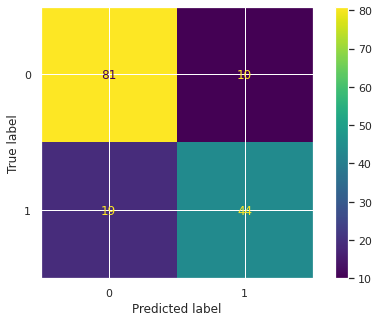

      Iter       Train Loss      OOB Improve   Remaining Time 
         1           0.9652           0.0248            1.50s
         2           0.9348           0.0257            1.96s
         3           0.8991           0.0210            1.99s
         4           0.8848           0.0226            1.99s
         5           0.8553           0.0203            1.99s
         6           0.8447           0.0181            1.98s
         7           0.8063           0.0178            1.97s
         8           0.8061           0.0169            1.97s
         9           0.7907           0.0144            1.97s
        10           0.7567           0.0113            1.97s
        20           0.6419           0.0071            1.77s
        30           0.5645           0.0041            1.74s
        40           0.5339           0.0016            1.65s
        50           0.5108          -0.0009            1.59s
        60           0.4226          -0.0012            1.53s
       

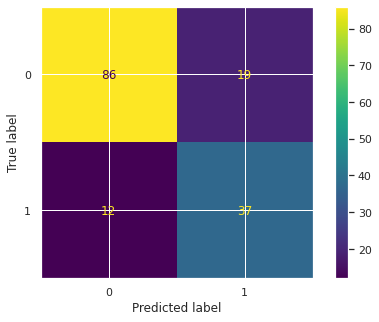

      Iter       Train Loss      OOB Improve   Remaining Time 
         1           0.9662           0.0271            2.27s
         2           0.9383           0.0244            2.88s
         3           0.9125           0.0210            3.39s
         4           0.8868           0.0220            3.21s
         5           0.8578           0.0192            3.09s
         6           0.8542           0.0189            3.01s
         7           0.8351           0.0194            2.94s
         8           0.8004           0.0168            2.94s
         9           0.7921           0.0166            3.01s
        10           0.7718           0.0131            2.96s
        20           0.6747           0.0061            2.47s
        30           0.5982           0.0007            2.28s
        40           0.5354           0.0015            2.18s
        50           0.5086          -0.0012            2.13s
        60           0.4810           0.0004            2.08s
       

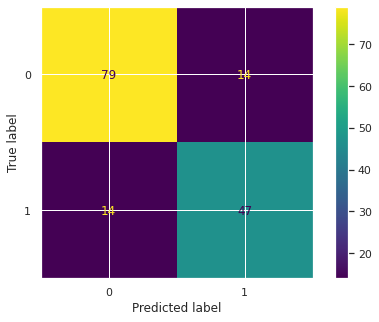

      Iter       Train Loss      OOB Improve   Remaining Time 
         1           0.9663           0.0258            2.13s
         2           0.9345           0.0256            3.64s
         3           0.9160           0.0241            3.30s
         4           0.8907           0.0189            3.10s
         5           0.8726           0.0204            3.11s
         6           0.8502           0.0197            3.03s
         7           0.8363           0.0193            2.97s
         8           0.8081           0.0166            2.91s
         9           0.7898           0.0170            2.87s
        10           0.7605           0.0150            2.83s
        20           0.6419           0.0063            2.41s
        30           0.5576           0.0044            2.38s
        40           0.5100           0.0025            2.32s
        50           0.4608           0.0030            2.30s
        60           0.4593           0.0001            2.23s
       

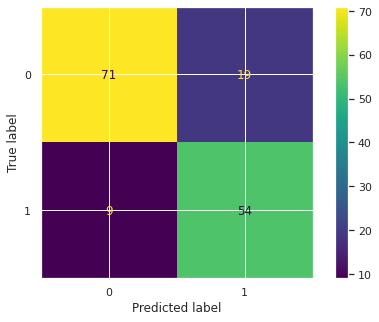

      Iter       Train Loss      OOB Improve   Remaining Time 
         1           0.9561           0.0198            2.45s
         2           0.9151           0.0202            2.88s
         3           0.9241           0.0190            2.84s
         4           0.8742           0.0183            2.80s
         5           0.8562           0.0153            2.77s
         6           0.8559           0.0181            2.73s
         7           0.8198           0.0143            2.71s
         8           0.8188           0.0114            2.68s
         9           0.8035           0.0143            2.68s
        10           0.7851           0.0137            2.66s
        20           0.6810           0.0057            2.34s
        30           0.6060           0.0014            2.21s
        40           0.5385          -0.0011            2.13s
        50           0.5819           0.0001            2.08s
        60           0.5712          -0.0016            2.04s
       

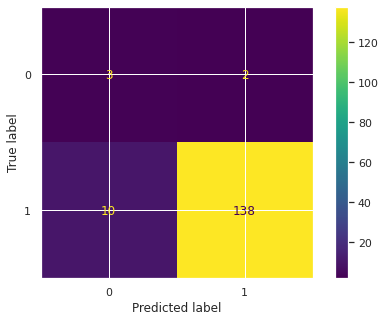


===================[검증]===================
acc_mean : 0.8334267040149393
rec_mean : 0.8027163664166007
prec_mean : 0.7942922433838671
f1_mean : 0.7959682881139004


In [ ]:
from sklearn.model_selection import KFold
from sklearn.preprocessing import RobustScaler, StandardScaler
from sklearn.ensemble import StackingClassifier, GradientBoostingClassifier, HistGradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay, confusion_matrix, recall_score, precision_score, f1_score

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import joblib

X = x_train_over.values
Y = y_train_over.values
validation = []
kfold = KFold(n_splits=5)
clf = joblib.load('clf_Titanic_GB_v1.7.0.pkl')

for train_index, test_index in kfold.split(X):
    x_train, x_val = X[train_index], X[test_index]
    y_train, y_val = Y[train_index], Y[test_index]

    # clf = make_pipeline(
    #     RobustScaler(),
    #     GradientBoostingClassifier(
    #         init = None,
    #         criterion = 'friedman_mse',
    #         learning_rate = 0.03,
    #         loss = 'deviance',
    #         max_depth = 8,
    #         max_features = 'auto',
    #         max_leaf_nodes = 2,
    #         min_samples_leaf = 2,
    #         min_samples_split = 2,
    #         n_estimators = 1000,
    #         n_iter_no_change = 300,
    #         subsample = 0.5,
    #         tol = 0.05,
    #         verbose = 1,
    #         random_state=1
    #     )
    # )

    y_pred = clf.fit(x_train, y_train).predict(x_val)
    validation.append(
        (
            accuracy_score(y_val, y_pred),
            recall_score(y_val, y_pred),
            precision_score(y_val, y_pred),
            f1_score(y_val, y_pred)
         )
    )

    print(f'accuracy_score : {accuracy_score(y_val, y_pred)}')
    print(f'recall_score : {recall_score(y_val, y_pred)}')
    print(f'precision_score : {precision_score(y_val, y_pred)}')
    print(f'f1_score : {f1_score(y_val, y_pred)}')
    print()

    sns.set_theme()
    plt.rcParams['figure.figsize'] = (8, 5)

    conf = ConfusionMatrixDisplay(
        confusion_matrix = confusion_matrix(y_val, y_pred),
        display_labels = clf.classes_
    )
    conf.plot()

    plt.show()

acc_mean = np.mean([x[0] for x in validation])
rec_mean = np.mean([x[1] for x in validation])
prec_mean = np.mean([x[2] for x in validation])
f1_mean = np.mean([x[3] for x in validation])

print()
print('===================[검증]===================')
print(f'acc_mean : {acc_mean}')
print(f'rec_mean : {rec_mean}')
print(f'prec_mean : {prec_mean}')
print(f'f1_mean : {f1_mean}')

#### 평가

In [ ]:
y_pred = clf.predict(x_test)

print()
print('===================[평가]===================')
print(f'accuracy_score : {accuracy_score(y_test, y_pred)}')
print(f'recall_score : {recall_score(y_test, y_pred)}')
print(f'precision_score : {precision_score(y_test, y_pred)}')
print(f'f1_score : {f1_score(y_test, y_pred)}')


===================[평가]===================
accuracy_score : 0.7873134328358209
recall_score : 0.6796116504854369
precision_score : 0.7446808510638298
f1_score : 0.7106598984771573


### Phase 2. Parch, Fare column 포함

#### 데이터 셋 생성

In [ ]:
from sklearn.model_selection import train_test_split

import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/도원결의 시즌2/dowon/도원/titanic.csv', encoding='utf-8', engine='python')

x_train, x_test, y_train, y_test = train_test_split(
    df.drop(['Survived'], axis=1),
    df['Survived'],
    test_size=0.3, shuffle=True, stratify=df['Survived']
)

# train 데이터 셋에 대한 df => Age에 결측값에 mean()으로 채워넣기 위한 빌드업
df = pd.concat([x_train, y_train], axis=1)
df_test = pd.concat([x_test, y_test], axis=1)
df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
252,253,1,"Stead, Mr. William Thomas",male,62.0,0,0,113514,26.550,C87,S,0
400,401,3,"Niskanen, Mr. Juha",male,39.0,0,0,STON/O 2. 3101289,7.925,NaN,S,1
289,290,3,"Connolly, Miss. Kate",female,22.0,0,0,370373,7.750,NaN,Q,1
231,232,3,"Larsson, Mr. Bengt Edvin",male,29.0,0,0,347067,7.775,NaN,S,0
119,120,3,"Andersson, Miss. Ellis Anna Maria",female,2.0,4,2,347082,31.275,NaN,S,0


In [ ]:
df.Age.median()

28.0

In [ ]:
from sklearn.preprocessing import LabelEncoder

import math
import warnings

warnings.filterwarnings("ignore")

## Sex column 처리
encoder = LabelEncoder()
df.Sex = encoder.fit_transform(df.Sex)

## Age column 결측값 채우기
cond_1 = df.loc[(df.SibSp == 0) & (df.Parch == 0)].index
cond_2 = df.loc[(df.Pclass == 3) | (df.Sex == "male") | (df.Survived == 0)].index
new_df = df.loc[cond_1 & cond_2]
df.Age.fillna(int(round(df.Age.mean(), 0)), inplace=True)
df.loc[df.Age % 1 != 0, "Age"] = df.loc[df.Age % 1 != 0, "Age"].apply(math.floor)
df.Age = df.Age.astype(int)

## Embarked column 처리 [결측값, 원핫인코딩]
df.Embarked.fillna("S", inplace=True)
df = pd.concat([df, pd.get_dummies(df.Embarked)], axis=1)
df.drop(['Embarked'], axis=1, inplace=True)

In [ ]:
# test 데이터 처리

## Sex column 처리
encoder = LabelEncoder()
df_test.Sex = encoder.fit_transform(df_test.Sex)

## Age column 결측값 채우기
cond_1 = df.loc[(df.SibSp == 0) & (df.Parch == 0)].index
cond_2 = df.loc[(df.Pclass == 3) | (df.Sex == "male") | (df.Survived == 0)].index
new_df = df.loc[cond_1 & cond_2]

df_test.Age.fillna(int(round(new_df.Age.mean(), 0)), inplace=True)
df_test.loc[df_test.Age % 1 != 0, "Age"] = df_test.loc[df_test.Age % 1 != 0, "Age"].apply(math.floor)
df_test.Age = df_test.Age.astype(int)

## Embarked column 처리 [결측값, 원핫인코딩]
df_test.Embarked.fillna("S", inplace=True)
df_test = pd.concat([df_test, pd.get_dummies(df_test.Embarked)], axis=1)
df_test.drop(['Embarked'], axis=1, inplace=True)

## object column 4가지['PassengerId', 'Ticket', 'Name', 'Cabin'] 제거
df.drop(['PassengerId', 'Ticket', 'Name', 'Cabin'], axis=1, inplace=True)
df_test.drop(['PassengerId', 'Ticket', 'Name', 'Cabin'], axis=1, inplace=True)

x_train = df.drop(['Survived'], axis=1)
x_test = df_test.drop(['Survived'], axis=1)

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

temp_df = pd.DataFrame()
X = x_train.copy()
X.drop(['S'], axis=1, inplace=True)
temp_df['Feature'] = X.columns
temp_df['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

x_train.drop(['S'], axis=1, inplace=True)
x_test.drop(['S'], axis=1, inplace=True)

temp_df

,Feature,VIF
0,Pclass,5.532718
1,Sex,3.274518
2,Age,4.590982
3,SibSp,1.651109
4,Parch,1.710525
5,Fare,1.871116
6,C,1.318434
7,Q,1.262134


In [ ]:
#@title 오버샘플링
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder

smote = SMOTE(random_state=42) # SMOTE 객체 생성

# 그냥 전처리가 아니라 단순히 SMOTE 기법을 시도하는 것이기 때문에 그냥 다버리고 오버샘플링 한번 보자.
x_train_over, y_train_over = smote.fit_resample(x_train, y_train)

pd.DataFrame(y_train_over).Survived.value_counts() # SMOTE 를 활용한 오버샘플링 적용 된 것 확인

0    384
1    384
Name: Survived, dtype: int64

In [ ]:
#@title 언더샘플링

# y_train_df = pd.DataFrame(y_train, columns=["Survived"])
# idx_0 = y_train_df.loc[y_train_df.Survived == 0].sample(y_train.value_counts()[1], random_state=68).index.tolist()
# idx_1 = y_train_df.loc[y_train_df.Survived == 1].index.tolist()
# random_idx = idx_0 + idx_1
# x_train_under = x_train.loc[random_idx]
# y_train_under = y_train_df.loc[random_idx]

# print(x_train_under.shape, '\n')
# print(y_train_under.shape, '\n')

#### 학습 & 검증

      Iter       Train Loss      OOB Improve   Remaining Time 
         1           1.3625           0.0245            1.58s
         2           1.3213           0.0226            2.06s
         3           1.3084           0.0214            2.06s
         4           1.2856           0.0207            2.15s
         5           1.2576           0.0190            2.17s
         6           1.2534           0.0182            2.05s
         7           1.2361           0.0172            2.11s
         8           1.2125           0.0162            2.03s
         9           1.2028           0.0152            1.97s
        10           1.1888           0.0142            1.91s
        20           1.0768           0.0087            1.70s
        30           0.9899           0.0047            1.58s
        40           0.9581           0.0033            1.52s
        50           0.9819           0.0020            1.47s
        60           0.9276           0.0012            1.45s
       

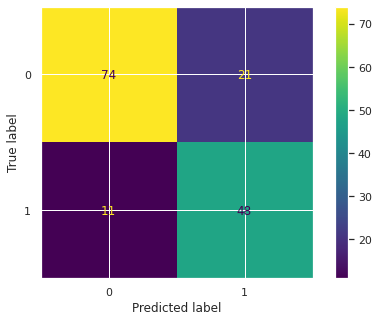

      Iter       Train Loss      OOB Improve   Remaining Time 
         1           1.3612           0.0238            2.03s
         2           1.3353           0.0220            2.03s
         3           1.3212           0.0212            2.01s
         4           1.2925           0.0200            2.13s
         5           1.2674           0.0186            2.08s
         6           1.2645           0.0177            2.00s
         7           1.2549           0.0166            1.97s
         8           1.2326           0.0158            1.92s
         9           1.2174           0.0150            1.87s
        10           1.1923           0.0141            1.83s
        20           1.1265           0.0081            1.38s
        30           1.0669           0.0034            1.23s
        40           0.9638           0.0024            1.16s
        50           1.0060           0.0010            1.13s
        60           0.8492           0.0013            1.09s
       

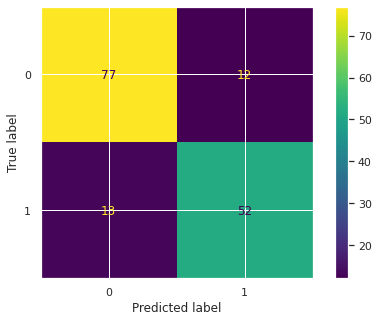

      Iter       Train Loss      OOB Improve   Remaining Time 
         1           1.3673           0.0255            1.10s
         2           1.3347           0.0239            1.37s
         3           1.3096           0.0225            1.53s
         4           1.2963           0.0214            1.59s
         5           1.2682           0.0202            1.60s
         6           1.2528           0.0190            1.59s
         7           1.2455           0.0184            1.58s
         8           1.2192           0.0172            1.59s
         9           1.2039           0.0161            1.59s
        10           1.2052           0.0150            1.57s
        20           1.0342           0.0086            1.26s
        30           1.0135           0.0051            1.15s
        40           0.9395           0.0037            1.12s
        50           0.9362           0.0027            1.07s
        60           0.9232           0.0018            1.03s
       

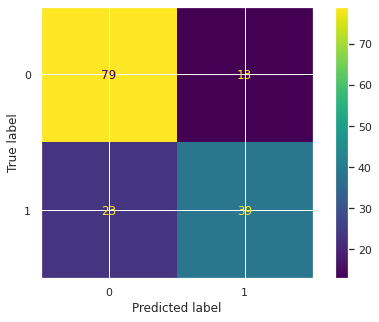

      Iter       Train Loss      OOB Improve   Remaining Time 
         1           1.3636           0.0236            1.92s
         2           1.3326           0.0224            1.93s
         3           1.3099           0.0206            1.81s
         4           1.2856           0.0193            1.85s
         5           1.2641           0.0184            1.79s
         6           1.2599           0.0174            1.85s
         7           1.2482           0.0166            1.81s
         8           1.2138           0.0155            1.77s
         9           1.2116           0.0147            1.78s
        10           1.1866           0.0140            1.77s
        20           1.1077           0.0082            1.36s
        30           1.0044           0.0048            1.21s
        40           1.0180           0.0027            1.14s
        50           1.0162           0.0018            1.09s
        60           0.9018           0.0013            1.06s
       

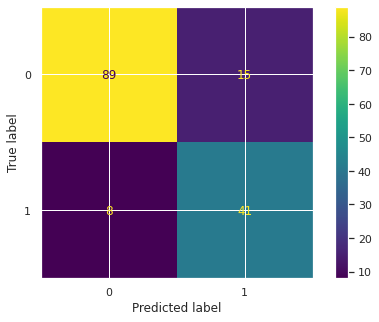

      Iter       Train Loss      OOB Improve   Remaining Time 
         1           1.2889           0.0205            1.94s
         2           1.2802           0.0208            1.97s
         3           1.2912           0.0180            1.85s
         4           1.2805           0.0174            1.78s
         5           1.2505           0.0161            1.72s
         6           1.2250           0.0157            1.68s
         7           1.1909           0.0154            1.65s
         8           1.2016           0.0133            1.63s
         9           1.1846           0.0126            1.62s
        10           1.2099           0.0116            1.61s
        20           1.0655           0.0067            1.27s
        30           1.0993           0.0041            1.20s
        40           0.9707           0.0028            1.13s
        50           0.9398           0.0023            1.08s
        60           0.9331           0.0014            1.04s
       

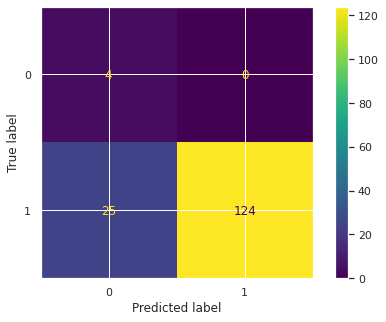


===================[검증]===================
acc_mean : 0.8164756811815636
rec_mean : 0.7823082078153274
prec_mean : 0.7980590062111801
f1_mean : 0.7859578732161352


In [ ]:
from sklearn.model_selection import KFold
from sklearn.preprocessing import RobustScaler, StandardScaler
from sklearn.ensemble import StackingClassifier, GradientBoostingClassifier, HistGradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay, confusion_matrix, recall_score, precision_score, f1_score

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import joblib

X = x_train_over.values
Y = y_train_over.values
validation = []
kfold = KFold(n_splits=5)
# clf = joblib.load('clf_Titanic_GB_v2.2.0.pkl')

for train_index, test_index in kfold.split(X):
    x_train, x_val = X[train_index], X[test_index]
    y_train, y_val = Y[train_index], Y[test_index]

    clf = make_pipeline(
        RobustScaler(),
        GradientBoostingClassifier(
            init = None,
            criterion = 'friedman_mse',
            learning_rate = 0.03,
            loss = 'deviance',
            max_depth = 8,
            max_features = 'auto',
            max_leaf_nodes = 2,
            min_samples_leaf = 2,
            min_samples_split = 2,
            n_estimators = 1000,
            n_iter_no_change = 300,
            subsample = 0.5,
            tol = 0.05,
            verbose = 1,
            random_state=2
        )
    )

    y_pred = clf.fit(x_train, y_train).predict(x_val)
    validation.append(
        (
            accuracy_score(y_val, y_pred),
            recall_score(y_val, y_pred),
            precision_score(y_val, y_pred),
            f1_score(y_val, y_pred)
         )
    )

    print(f'accuracy_score : {accuracy_score(y_val, y_pred)}')
    print(f'recall_score : {recall_score(y_val, y_pred)}')
    print(f'precision_score : {precision_score(y_val, y_pred)}')
    print(f'f1_score : {f1_score(y_val, y_pred)}')
    print()

    sns.set_theme()
    plt.rcParams['figure.figsize'] = (8, 5)

    conf = ConfusionMatrixDisplay(
        confusion_matrix = confusion_matrix(y_val, y_pred),
        display_labels = clf.classes_
    )
    conf.plot()

    plt.show()

acc_mean = np.mean([x[0] for x in validation])
rec_mean = np.mean([x[1] for x in validation])
prec_mean = np.mean([x[2] for x in validation])
f1_mean = np.mean([x[3] for x in validation])

print()
print('===================[검증]===================')
print(f'acc_mean : {acc_mean}')
print(f'rec_mean : {rec_mean}')
print(f'prec_mean : {prec_mean}')
print(f'f1_mean : {f1_mean}')

#### 평가

In [ ]:
y_pred = clf.predict(x_test)

print()
print('===================[평가]===================')
print(f'accuracy_score : {accuracy_score(y_test, y_pred)}')
print(f'recall_score : {recall_score(y_test, y_pred)}')
print(f'precision_score : {precision_score(y_test, y_pred)}')
print(f'f1_score : {f1_score(y_test, y_pred)}')


===================[평가]===================
accuracy_score : 0.7611940298507462
recall_score : 0.6310679611650486
precision_score : 0.7142857142857143
f1_score : 0.6701030927835051


### Phase 3. 전부 미포함

#### 데이터 셋 생성

In [36]:
from sklearn.model_selection import train_test_split

import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/도원결의 시즌2/dowon/도원/titanic.csv', encoding='utf-8', engine='python')

x_train, x_test, y_train, y_test = train_test_split(
    df.drop(['Survived'], axis=1),
    df['Survived'],
    test_size=0.3, shuffle=True, stratify=df['Survived']
)

# train 데이터 셋에 대한 df => Age에 결측값에 mean()으로 채워넣기 위한 빌드업
df = pd.concat([x_train, y_train], axis=1)
df_test = pd.concat([x_test, y_test], axis=1)
df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
653,654,3,"O'Leary, Miss. Hanora ""Norah""",female,NaN,0,0,330919,7.8292,NaN,Q,1
590,591,3,"Rintamaki, Mr. Matti",male,35.0,0,0,STON/O 2. 3101273,7.1250,NaN,S,0
417,418,2,"Silven, Miss. Lyyli Karoliina",female,18.0,0,2,250652,13.0000,NaN,S,1
731,732,3,"Hassan, Mr. Houssein G N",male,11.0,0,0,2699,18.7875,NaN,C,0
517,518,3,"Ryan, Mr. Patrick",male,NaN,0,0,371110,24.1500,NaN,Q,0


In [37]:
from sklearn.preprocessing import LabelEncoder

import math
import warnings

warnings.filterwarnings("ignore")

## Sex column 처리
encoder = LabelEncoder()
df.Sex = encoder.fit_transform(df.Sex)

## Age column 결측값 채우기
cond_1 = df.loc[(df.SibSp == 0) & (df.Parch == 0)].index
cond_2 = df.loc[(df.Pclass == 3) | (df.Sex == "male") | (df.Survived == 0)].index
new_df = df.loc[cond_1 & cond_2]
df.Age.fillna(int(round(new_df.Age.mean(), 0)), inplace=True)
df.loc[df.Age % 1 != 0, "Age"] = df.loc[df.Age % 1 != 0, "Age"].apply(math.floor)
df.Age = df.Age.astype(int)

## Embarked column 처리 [결측값, 원핫인코딩]
df.Embarked.fillna("S", inplace=True)
df = pd.concat([df, pd.get_dummies(df.Embarked)], axis=1)
df.drop(['Embarked'], axis=1, inplace=True)

In [38]:
# test 데이터 처리

## Sex column 처리
encoder = LabelEncoder()
df_test.Sex = encoder.fit_transform(df_test.Sex)

## Age column 결측값 채우기
cond_1 = df.loc[(df.SibSp == 0) & (df.Parch == 0)].index
cond_2 = df.loc[(df.Pclass == 3) | (df.Sex == "male") | (df.Survived == 0)].index
new_df = df.loc[cond_1 & cond_2]

df_test.Age.fillna(int(round(new_df.Age.mean(), 0)), inplace=True)
df_test.loc[df_test.Age % 1 != 0, "Age"] = df_test.loc[df_test.Age % 1 != 0, "Age"].apply(math.floor)
df_test.Age = df_test.Age.astype(int)

## Embarked column 처리 [결측값, 원핫인코딩]
df_test.Embarked.fillna("S", inplace=True)
df_test = pd.concat([df_test, pd.get_dummies(df_test.Embarked)], axis=1)
df_test.drop(['Embarked'], axis=1, inplace=True)

## object column 6가지['PassengerId', 'Ticket', 'Name', 'Cabin', 'Parch', 'Fare'] 제거
df_test.drop(['PassengerId', 'Ticket', 'Name', 'Cabin', 'Parch', 'Fare'], axis=1, inplace=True)
df.drop(['PassengerId', 'Ticket', 'Name', 'Cabin', 'Parch', 'Fare'], axis=1, inplace=True)

x_train = df.drop(['Survived'], axis=1)
x_test = df_test.drop(['Survived'], axis=1)

In [39]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

temp_df = pd.DataFrame()
X = x_train.copy()
x_train.drop(['S'], axis=1, inplace=True)
x_test.drop(['S'], axis=1, inplace=True)
X.drop(['S'], axis=1, inplace=True)
temp_df['Feature'] = X.columns
temp_df['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
temp_df

,Feature,VIF
0,Pclass,5.030728
1,Sex,3.005288
2,Age,3.689741
3,SibSp,1.247001
4,C,1.227838
5,Q,1.200944


In [40]:
#@title 오버샘플링
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder

smote = SMOTE(random_state=42) # SMOTE 객체 생성

# 그냥 전처리가 아니라 단순히 SMOTE 기법을 시도하는 것이기 때문에 그냥 다버리고 오버샘플링 한번 보자.
x_train_over, y_train_over = smote.fit_resample(x_train, y_train)

pd.DataFrame(y_train_over).Survived.value_counts() # SMOTE 를 활용한 오버샘플링 적용 된 것 확인

1    384
0    384
Name: Survived, dtype: int64

In [41]:
#@title 언더샘플링
# y_train_df = pd.DataFrame(y_train, columns=["Survived"])
# idx_0 = y_train_df.loc[y_train_df.Survived == 0].sample(y_train.value_counts()[1], random_state=68).index.tolist()
# idx_1 = y_train_df.loc[y_train_df.Survived == 1].index.tolist()
# random_idx = idx_0 + idx_1
# x_train_under = x_train.loc[random_idx]
# y_train_under = y_train_df.loc[random_idx]

# print(y_train_under.value_counts(), '\n')

#### 학습 & 검증

      Iter       Train Loss      OOB Improve   Remaining Time 
         1           1.3560           0.0222            2.07s
         2           1.3371           0.0210            2.37s
         3           1.3218           0.0198            2.20s
         4           1.2930           0.0187            2.09s
         5           1.2851           0.0172            2.07s
         6           1.2630           0.0166            2.03s
         7           1.2515           0.0159            1.99s
         8           1.2428           0.0148            2.00s
         9           1.2245           0.0141            1.97s
        10           1.1925           0.0133            1.96s
        20           1.1100           0.0077            1.66s
        30           0.9827           0.0041            1.56s
        40           0.9797           0.0024            1.49s
        50           1.0089           0.0015            1.44s
        60           0.8884           0.0009            1.45s
       

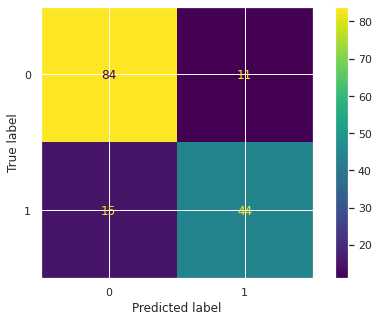

      Iter       Train Loss      OOB Improve   Remaining Time 
         1           1.3541           0.0231            1.67s
         2           1.3391           0.0220            1.78s
         3           1.3136           0.0209            1.68s
         4           1.2870           0.0196            1.64s
         5           1.2827           0.0181            1.64s
         6           1.2604           0.0175            1.61s
         7           1.2380           0.0165            1.60s
         8           1.2289           0.0155            1.59s
         9           1.2104           0.0147            1.57s
        10           1.1767           0.0137            1.57s
        20           1.0991           0.0080            1.28s
        30           0.9879           0.0046            1.18s
        40           0.9815           0.0027            1.13s
        50           0.9403           0.0019            1.14s
        60           0.9214           0.0015            1.10s
       

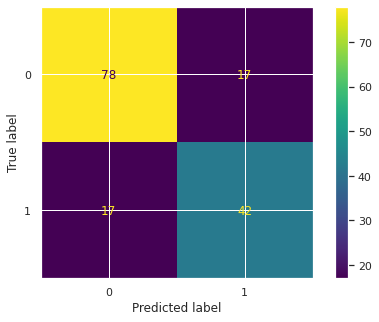

      Iter       Train Loss      OOB Improve   Remaining Time 
         1           1.3580           0.0233            1.70s
         2           1.3379           0.0220            1.73s
         3           1.3186           0.0207            1.68s
         4           1.2927           0.0196            1.68s
         5           1.2759           0.0180            1.70s
         6           1.2524           0.0173            1.67s
         7           1.2380           0.0162            1.65s
         8           1.2197           0.0153            1.63s
         9           1.2125           0.0145            1.63s
        10           1.1928           0.0137            1.63s
        20           1.0830           0.0081            1.30s
        30           1.0560           0.0030            1.18s
        40           0.9991           0.0030            1.13s
        50           0.9567           0.0021            1.08s
        60           0.9914          -0.0001            1.05s
       

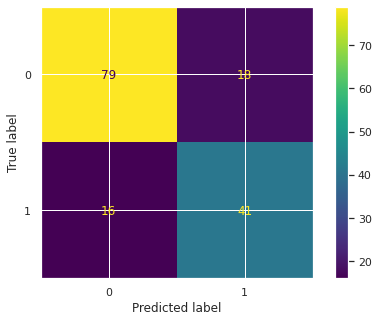

      Iter       Train Loss      OOB Improve   Remaining Time 
         1           1.3646           0.0224            1.79s
         2           1.3423           0.0210            2.22s
         3           1.3308           0.0196            2.07s
         4           1.2974           0.0187            1.93s
         5           1.2775           0.0175            1.87s
         6           1.2686           0.0165            1.82s
         7           1.2406           0.0155            1.79s
         8           1.2325           0.0147            1.76s
         9           1.2278           0.0138            1.73s
        10           1.2132           0.0131            1.72s
        20           1.1058           0.0076            1.35s
        30           1.0843           0.0028            1.22s
        40           0.9945           0.0030            1.15s
        50           0.9757           0.0023            1.11s
        60           0.9488           0.0018            1.09s
       

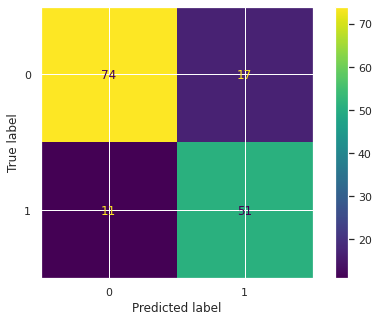

      Iter       Train Loss      OOB Improve   Remaining Time 
         1           1.3116           0.0188            1.70s
         2           1.2773           0.0181            1.78s
         3           1.2925           0.0165            1.77s
         4           1.2254           0.0160            1.76s
         5           1.2277           0.0149            1.73s
         6           1.2142           0.0137            1.75s
         7           1.1970           0.0130            1.74s
         8           1.2370           0.0120            1.70s
         9           1.2069           0.0120            1.68s
        10           1.1619           0.0109            1.69s
        20           1.1169           0.0056            1.31s
        30           1.0771           0.0031            1.20s
        40           1.0353           0.0003            1.13s
        50           1.0327           0.0018            1.08s
        60           0.9888           0.0016            1.04s
       

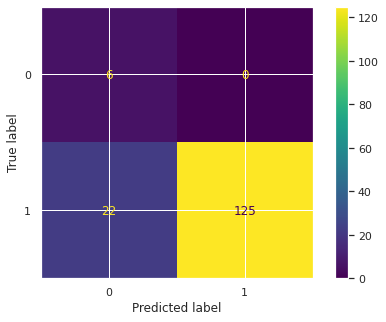


===================[검증]===================
acc_mean : 0.8125626007978948
rec_mean : 0.7699692290947631
prec_mean : 0.7913559322033898
f1_mean : 0.7788847629478821


In [42]:
from sklearn.model_selection import KFold
from sklearn.preprocessing import RobustScaler, StandardScaler
from sklearn.ensemble import GradientBoostingClassifier, StackingClassifier
from sklearn.linear_model import Ridge, LogisticRegression
from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay, confusion_matrix, recall_score, precision_score, f1_score
from sklearn.pipeline import make_pipeline

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import joblib

X = x_train_over.values
Y = y_train_over.values
validation = []
kfold = KFold(n_splits=5)
# clf = joblib.load("clf_Titanic_GB_v3.1.0.pkl")

for train_index, test_index in kfold.split(X):
    x_train, x_val = X[train_index], X[test_index]
    y_train, y_val = Y[train_index], Y[test_index]

    clf = make_pipeline(
        RobustScaler(),
        GradientBoostingClassifier(
            init = None,
            criterion = 'friedman_mse',
            learning_rate = 0.03,
            loss = 'deviance',
            max_depth = 8,
            max_features = 'auto',
            max_leaf_nodes = 2,
            min_samples_leaf = 2,
            min_samples_split = 2,
            n_estimators = 1000,
            n_iter_no_change = 300,
            subsample = 0.5,
            tol = 0.05,
            verbose = 1,
            random_state=3
        )
    )

    # estimators = [
    #     ('gb', make_pipeline(RobustScaler(), GradientBoostingClassifier(
    #         criterion = 'squared_error',
    #         learning_rate = 0.01,
    #         loss = 'exponential',
    #         max_depth = 8,
    #         min_samples_leaf = 2,
    #         min_samples_split = 4,
    #         n_estimators = 500,
    #         subsample = 0.5,
    #         random_state=3
    #     )))
    # ]

    # # 메타 모델 정의하기
    # clf = StackingClassifier(
    #     estimators=estimators,
    #     final_estimator=LogisticRegression(penalty='l2', C=0.05)
    # )

    y_pred = clf.fit(x_train, y_train).predict(x_val)
    validation.append(
        (
            accuracy_score(y_val, y_pred),
            recall_score(y_val, y_pred),
            precision_score(y_val, y_pred),
            f1_score(y_val, y_pred),
        )
    )

    print(f'accuracy_score : {accuracy_score(y_val, y_pred)}')
    print(f'recall_score : {recall_score(y_val, y_pred)}')
    print(f'precision_score : {precision_score(y_val, y_pred)}')
    print(f'f1_score : {f1_score(y_val, y_pred)}')
    print()

    sns.set_theme()
    plt.rcParams['figure.figsize'] = (8, 5)

    conf = ConfusionMatrixDisplay(
        confusion_matrix = confusion_matrix(y_val, y_pred),
        display_labels = clf.classes_
    )
    conf.plot()

    plt.show()

acc_mean = np.mean([x[0] for x in validation])
rec_mean = np.mean([x[1] for x in validation])
prec_mean = np.mean([x[2] for x in validation])
f1_mean = np.mean([x[3] for x in validation])

print()
print('===================[검증]===================')
print(f'acc_mean : {acc_mean}')
print(f'rec_mean : {rec_mean}')
print(f'prec_mean : {prec_mean}')
print(f'f1_mean : {f1_mean}')

#### 평가

In [62]:
?ConfusionMatrixDisplay


===================[평가]===================
accuracy_score : 0.7873134328358209
recall_score : 0.6310679611650486
precision_score : 0.7738095238095238
f1_score : 0.6951871657754012

confusion_matrix : 

classfication_report : 
              precision    recall  f1-score   support

           0       0.79      0.88      0.84       165
           1       0.77      0.63      0.70       103

    accuracy                           0.79       268
   macro avg       0.78      0.76      0.77       268
weighted avg       0.79      0.79      0.78       268



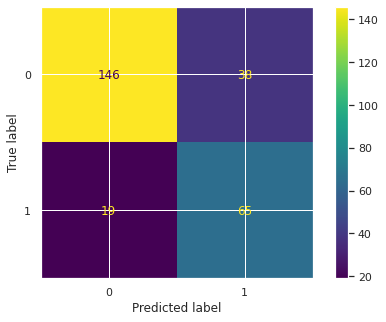

In [61]:
from sklearn.metrics import classification_report

y_pred = clf.predict(x_test)
conf = ConfusionMatrixDisplay(
    confusion_matrix=confusion_matrix(y_pred, y_test), 
    display_labels=clf.classes_,
)


print()
print('===================[평가]===================')
print(f'accuracy_score : {accuracy_score(y_test, y_pred)}')
print(f'recall_score : {recall_score(y_test, y_pred)}')
print(f'precision_score : {precision_score(y_test, y_pred)}')
print(f'f1_score : {f1_score(y_test, y_pred)}')
print()
print(f'confusion_matrix : \n{conf.plot()}')
print()
print(f'classfication_report : \n{classification_report(y_test, y_pred)}')


### 모델 저장

In [ ]:
# import joblib

# joblib.dump(clf, 'clf_Titanic_GB_v3.1.1.pkl', compress=True)

['clf_Titanic_GB_v3.1.1.pkl']

accuracy_score : 0.8395522388059702
recall_score : 0.7766990291262136
precision_score : 0.8
f1_score : 0.788177339901478


### 하이퍼파라미터 적용 전

In [ ]:
?GradientBoostingClassifier

In [ ]:
from sklearn.model_selection import KFold
from sklearn.preprocessing import RobustScaler, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.pipeline import make_pipeline
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, recall_score, precision_score, f1_score, classification_report

X = x_train_over.values
Y = y_train_over.values
kfold = KFold(n_splits=5)

for train_index, test_index in kfold.split(X):
    x_train, x_val = X[train_index], X[test_index]
    y_train, y_val = Y[train_index], Y[test_index]

    model = make_pipeline(
        RobustScaler(),
        GradientBoostingClassifier(
            random_state=1
        )
    )

    y_pred = model.fit(x_train, y_train).predict(x_val)

    print(f'accuracy_score : {accuracy_score(y_val, y_pred)}')
    print(f'recall_score : {recall_score(y_val, y_pred)}')
    print(f'precision_score : {precision_score(y_val, y_pred)}')
    print(f'f1_score : {f1_score(y_val, y_pred)}')
    print()

y_pred = model.predict(x_test)

print(f'accuracy_score : {accuracy_score(y_test, y_pred)}')
print(f'recall_score : {recall_score(y_test, y_pred)}')
print(f'precision_score : {precision_score(y_test, y_pred)}')
print(f'f1_score : {f1_score(y_test, y_pred)}')
print()

accuracy_score : 0.8701298701298701
recall_score : 0.8275862068965517
precision_score : 0.8275862068965517
f1_score : 0.8275862068965517

accuracy_score : 0.7337662337662337
recall_score : 0.8181818181818182
precision_score : 0.5921052631578947
f1_score : 0.6870229007633587

accuracy_score : 0.8246753246753247
recall_score : 0.7619047619047619
precision_score : 0.8
f1_score : 0.7804878048780488

accuracy_score : 0.7843137254901961
recall_score : 0.639344262295082
precision_score : 0.78
f1_score : 0.7027027027027027

accuracy_score : 0.8496732026143791
recall_score : 0.8435374149659864
precision_score : 1.0
f1_score : 0.915129151291513

accuracy_score : 0.7947761194029851
recall_score : 0.6893203883495146
precision_score : 0.7553191489361702
f1_score : 0.7208121827411168



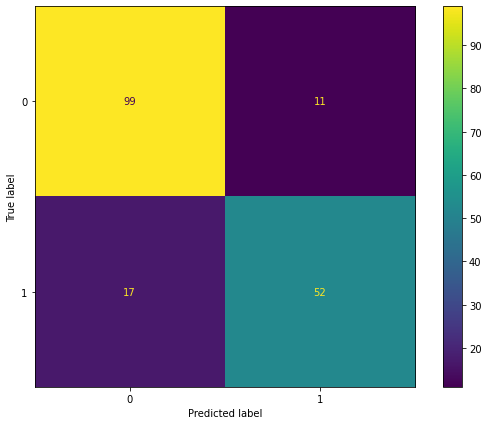

In [ ]:
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = (10, 7)

conf = ConfusionMatrixDisplay(
    confusion_matrix = confusion_matrix(y_test, y_pred),
    display_labels = model.classes_
)
conf.plot()

plt.show()

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.82      0.81       165
           1       0.70      0.68      0.69       103

    accuracy                           0.76       268
   macro avg       0.75      0.75      0.75       268
weighted avg       0.76      0.76      0.76       268



In [ ]:
print(f'accuracy_score : {accuracy_score(y_test, y_pred)}')
print(f'recall_score : {recall_score(y_test, y_pred)}')
print(f'precision_score : {precision_score(y_test, y_pred)}')
print(f'f1_score : {f1_score(y_test, y_pred)}')

accuracy_score : 0.7649253731343284
recall_score : 0.6796116504854369
precision_score : 0.7
f1_score : 0.6896551724137931


### 하이퍼파라미터 적용 후

accuracy_score : 0.8125
recall_score : 0.7681159420289855
precision_score : 0.7571428571428571
f1_score : 0.762589928057554



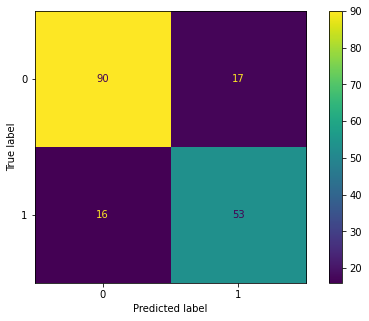

accuracy_score : 0.7670454545454546
recall_score : 0.671875
precision_score : 0.6825396825396826
f1_score : 0.6771653543307087



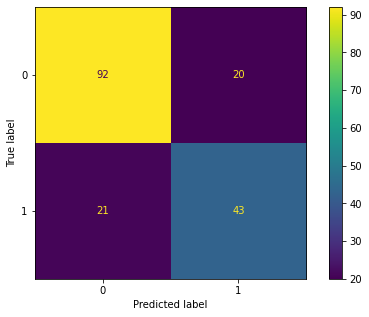

accuracy_score : 0.8295454545454546
recall_score : 0.8181818181818182
precision_score : 0.75
f1_score : 0.7826086956521738



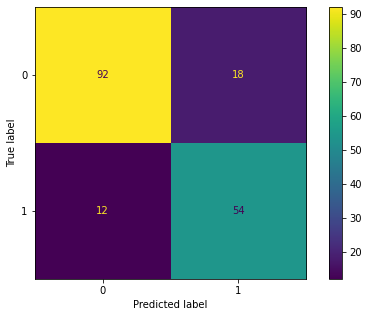

accuracy_score : 0.7885714285714286
recall_score : 0.7246376811594203
precision_score : 0.7352941176470589
f1_score : 0.7299270072992701



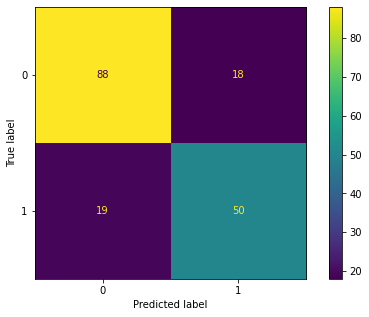

accuracy_score : 0.9085714285714286
recall_score : 0.9064327485380117
precision_score : 1.0
f1_score : 0.950920245398773



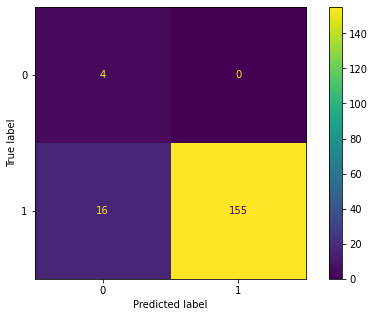

In [ ]:
from sklearn.model_selection import KFold
from sklearn.preprocessing import RobustScaler, StandardScaler
from sklearn.linear_model import LogisticRegression, Ridge
from sklearn.ensemble import GradientBoostingClassifier, StackingRegressor, HistGradientBoostingClassifier
from sklearn.pipeline import make_pipeline
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, recall_score, precision_score, f1_score, classification_report

import matplotlib.pyplot as plt

X = x_train_over.values
Y = y_train_over.values
kfold = KFold(n_splits=5)

for train_index, test_index in kfold.split(X):
    x_train, x_val = X[train_index], X[test_index]
    y_train, y_val = Y[train_index], Y[test_index]

    model = make_pipeline(
        RobustScaler(),
        GradientBoostingClassifier(
            criterion = 'squared_error',
            learning_rate = 0.05,
            loss = 'exponential',
            max_depth = 10,
            min_samples_leaf = 2,
            min_samples_split = 4,
            n_estimators = 500,
            subsample = 0.5,
            random_state=2
        )
    )


    y_pred = model.fit(x_train, y_train).predict(x_val)


    print(f'accuracy_score : {accuracy_score(y_val, y_pred)}')
    print(f'recall_score : {recall_score(y_val, y_pred)}')
    print(f'precision_score : {precision_score(y_val, y_pred)}')
    print(f'f1_score : {f1_score(y_val, y_pred)}')
    print()

    plt.rcParams['figure.figsize'] = (8, 5)

    conf = ConfusionMatrixDisplay(
        confusion_matrix = confusion_matrix(y_val, y_pred),
        display_labels = model.classes_
    )
    conf.plot()

    plt.show()

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.85      0.86       110
           1       0.77      0.78      0.78        69

    accuracy                           0.83       179
   macro avg       0.82      0.82      0.82       179
weighted avg       0.83      0.83      0.83       179



In [ ]:
print(f'accuracy_score : {accuracy_score(y_test, y_pred)}')
print(f'recall_score : {recall_score(y_test, y_pred)}')
print(f'precision_score : {precision_score(y_test, y_pred)}')
print(f'f1_score : {f1_score(y_test, y_pred)}')

accuracy_score : 0.8268156424581006
recall_score : 0.782608695652174
precision_score : 0.7714285714285715
f1_score : 0.7769784172661871


### 실험

accuracy_score : 0.8051948051948052
recall_score : 0.8032786885245902
precision_score : 0.7313432835820896
f1_score : 0.765625



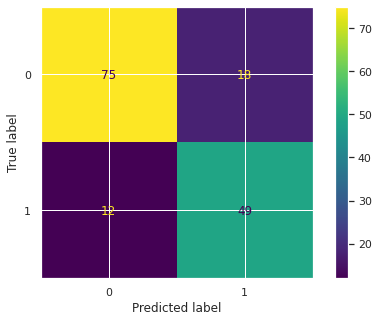

accuracy_score : 0.7987012987012987
recall_score : 0.7540983606557377
precision_score : 0.7419354838709677
f1_score : 0.7479674796747967



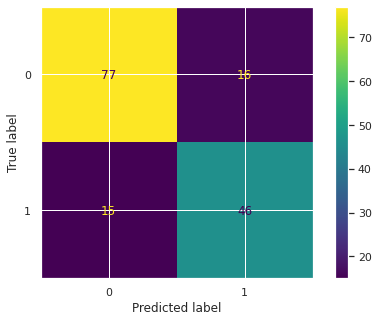

accuracy_score : 0.7662337662337663
recall_score : 0.7592592592592593
precision_score : 0.640625
f1_score : 0.6949152542372882



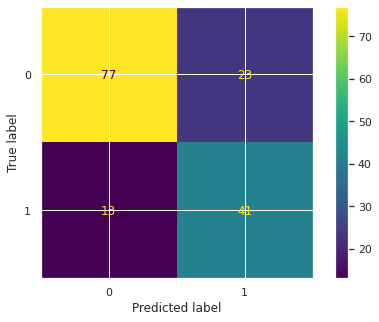

accuracy_score : 0.8562091503267973
recall_score : 0.8983050847457628
precision_score : 0.7681159420289855
f1_score : 0.828125



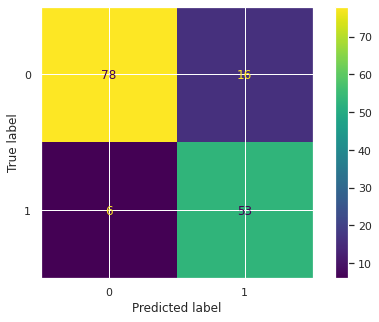

accuracy_score : 0.8888888888888888
recall_score : 0.8926174496644296
precision_score : 0.9925373134328358
f1_score : 0.9399293286219081



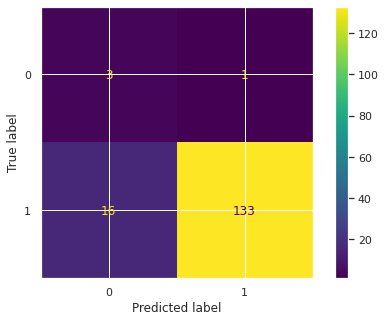


===================[검증]===================
acc_mean : 0.8230455818691113
rec_mean : 0.8215117685699559
prec_mean : 0.7749114045829757
f1_mean : 0.7953124125067986


In [ ]:
from sklearn.model_selection import KFold
from sklearn.preprocessing import RobustScaler, StandardScaler
from sklearn.ensemble import RandomForestClassifier, StackingClassifier, GradientBoostingClassifier, HistGradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay, confusion_matrix, recall_score, precision_score, f1_score

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import joblib

X = x_train_over.values
Y = y_train_over.values
validation = []
kfold = KFold(n_splits=5)
# clf = joblib.load("clf_Titanic_GB_v1.pkl")

for train_index, test_index in kfold.split(X):
    x_train, x_val = X[train_index], X[test_index]
    y_train, y_val = Y[train_index], Y[test_index]

    # 모델 정의하기
    estimators = [
        ('svc', SVC()),
        ('gb', make_pipeline
            (
                RobustScaler(), 
                GradientBoostingClassifier(
                    init = None,
                    criterion = 'friedman_mse',
                    learning_rate = 0.03,
                    loss = 'deviance',
                    max_depth = 8,
                    max_features = 'auto',
                    max_leaf_nodes = 2,
                    min_samples_leaf = 2,
                    min_samples_split = 2,
                    n_estimators = 1000,
                    n_iter_no_change = 300,
                    subsample = 0.5,
                    tol = 0.05,
                    verbose = 1,
                    random_state=10
                )
            )
        )
    ]

    # 메타 모델 정의하기
    clf = StackingClassifier(
        estimators=estimators,
        final_estimator=LogisticRegression(penalty='l2', C=0.1)
    )

    y_pred = clf.fit(x_train, y_train).predict(x_val)
    validation.append(
        (
            accuracy_score(y_val, y_pred),
            recall_score(y_val, y_pred),
            precision_score(y_val, y_pred),
            f1_score(y_val, y_pred)
         )
    )

    print(f'accuracy_score : {accuracy_score(y_val, y_pred)}')
    print(f'recall_score : {recall_score(y_val, y_pred)}')
    print(f'precision_score : {precision_score(y_val, y_pred)}')
    print(f'f1_score : {f1_score(y_val, y_pred)}')
    print()

    sns.set_theme()
    plt.rcParams['figure.figsize'] = (8, 5)

    conf = ConfusionMatrixDisplay(
        confusion_matrix = confusion_matrix(y_val, y_pred),
        display_labels = clf.classes_
    )
    conf.plot()

    plt.show()

acc_mean = np.mean([x[0] for x in validation])
rec_mean = np.mean([x[1] for x in validation])
prec_mean = np.mean([x[2] for x in validation])
f1_mean = np.mean([x[3] for x in validation])

print()
print('===================[검증]===================')
print(f'acc_mean : {acc_mean}')
print(f'rec_mean : {rec_mean}')
print(f'prec_mean : {prec_mean}')
print(f'f1_mean : {f1_mean}')

#### 평가

In [ ]:
y_pred = clf.predict(x_test)

print()
print('===================[평가]===================')
print(f'accuracy_score : {accuracy_score(y_test, y_pred)}')
print(f'recall_score : {recall_score(y_test, y_pred)}')
print(f'precision_score : {precision_score(y_test, y_pred)}')
print(f'f1_score : {f1_score(y_test, y_pred)}')


===================[평가]===================
accuracy_score : 0.8022388059701493
recall_score : 0.7184466019417476
precision_score : 0.7551020408163265
f1_score : 0.736318407960199


#### 기타 1. Name, Parch, Fare, Cabin column 포함

##### 데이터 셋 생성

In [ ]:
from sklearn.model_selection import train_test_split

import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/도원결의 시즌2/dowon/도원/titanic.csv', encoding='utf-8', engine='python')

x_train, x_test, y_train, y_test = train_test_split(
    df.drop(['Survived'], axis=1),
    df['Survived'],
    test_size=0.3, shuffle=True, stratify=df['Survived']
)

# train 데이터 셋에 대한 df => Age에 결측값에 mean()으로 채워넣기 위한 빌드업
df = pd.concat([x_train, y_train], axis=1)
df_test = pd.concat([x_test, y_test], axis=1)
df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
649,650,3,"Stanley, Miss. Amy Zillah Elsie",female,23.0,0,0,CA. 2314,7.5500,NaN,S,1
553,554,3,"Leeni, Mr. Fahim (""Philip Zenni"")",male,22.0,0,0,2620,7.2250,NaN,C,1
164,165,3,"Panula, Master. Eino Viljami",male,1.0,4,1,3101295,39.6875,NaN,S,0
334,335,1,"Frauenthal, Mrs. Henry William (Clara Heinshei...",female,NaN,1,0,PC 17611,133.6500,NaN,S,1
424,425,3,"Rosblom, Mr. Viktor Richard",male,18.0,1,1,370129,20.2125,NaN,S,0


In [ ]:
df.loc[df.Name.str.contains("Panula")]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
164,165,3,"Panula, Master. Eino Viljami",male,1.0,4,1,3101295,39.6875,NaN,S,0
50,51,3,"Panula, Master. Juha Niilo",male,7.0,4,1,3101295,39.6875,NaN,S,0
824,825,3,"Panula, Master. Urho Abraham",male,2.0,4,1,3101295,39.6875,NaN,S,0
686,687,3,"Panula, Mr. Jaako Arnold",male,14.0,4,1,3101295,39.6875,NaN,S,0
638,639,3,"Panula, Mrs. Juha (Maria Emilia Ojala)",female,41.0,0,5,3101295,39.6875,NaN,S,0


In [ ]:
import numpy as np

def unify_cabin(x):
    result = ""
    if type(x) == float:
        return np.nan
    result = x[0]
    return result

def convert_name(name:str) -> str:
    return name.split()[0]

In [ ]:
from sklearn.preprocessing import LabelEncoder

df.Cabin = df.Cabin.apply(unify_cabin)
encoder = LabelEncoder()
df.Cabin = encoder.fit_transform(df.Cabin)

df_test.Cabin = df_test.Cabin.apply(unify_cabin)
encoder = LabelEncoder()
df_test.Cabin = encoder.fit_transform(df_test.Cabin)

In [ ]:
from sklearn.preprocessing import LabelEncoder

import math
import warnings

warnings.filterwarnings("ignore")

## Sex column 처리
encoder = LabelEncoder()
df.Sex = encoder.fit_transform(df.Sex)

## Age column 결측값 채우기
cond_1 = df.loc[(df.SibSp == 0) & (df.Parch == 0)].index
cond_2 = df.loc[(df.Pclass == 3) | (df.Sex == "male") | (df.Survived == 0)].index
new_df = df.loc[cond_1 & cond_2]
df.Age.fillna(int(round(new_df.Age.mean(), 0)), inplace=True)
df.loc[df.Age % 1 != 0, "Age"] = df.loc[df.Age % 1 != 0, "Age"].apply(math.floor)
df.Age = df.Age.astype(int)

## Embarked column 처리 [결측값, 원핫인코딩]
df.Embarked.fillna("S", inplace=True)
df = pd.concat([df, pd.get_dummies(df.Embarked)], axis=1)
df.drop(['Embarked'], axis=1, inplace=True)

## Name column 처리
new_df = df.loc[(df.SibSp >= 2) | (df.Parch >= 2)]
new_df.Name = new_df.Name.apply(convert_name)
df.drop(new_df.index, axis=0, inplace=True)
df = df.append(new_df)
df.Name = encoder.fit_transform(df['Name'])

### 원핫인코딩 [하지말것 => 차원의 저주]
# temp_df = pd.get_dummies(df.Name)
# temp_df.columns = list(map(str, temp_df.columns.tolist()))
# df = pd.concat([df, temp_df], axis=1)
# df.drop(['Name'], axis=1, inplace=True)

In [ ]:
# test 데이터 처리
## Sex column 처리
encoder = LabelEncoder()
df_test.Sex = encoder.fit_transform(df_test.Sex)

## Age column 결측값 채우기
cond_1 = df.loc[(df.SibSp == 0) & (df.Parch == 0)].index
cond_2 = df.loc[(df.Pclass == 3) | (df.Sex == "male") | (df.Survived == 0)].index
new_df = df.loc[cond_1 & cond_2]

df_test.Age.fillna(int(round(new_df.Age.mean(), 0)), inplace=True)
df_test.loc[df_test.Age % 1 != 0, "Age"] = df_test.loc[df_test.Age % 1 != 0, "Age"].apply(math.floor)
df_test.Age = df_test.Age.astype(int)

## Embarked column 처리 [결측값, 원핫인코딩]
df_test.Embarked.fillna("S", inplace=True)
df_test = pd.concat([df_test, pd.get_dummies(df_test.Embarked)], axis=1)
df_test.drop(['Embarked'], axis=1, inplace=True)

## Name column 처리
new_df = df_test.loc[(df_test.SibSp >= 2) | (df_test.Parch >= 2)]
new_df.Name = new_df.Name.apply(convert_name)
df_test.drop(new_df.index, axis=0, inplace=True)
df_test = df_test.append(new_df)

### 원핫인코딩 [하지말것. => 차원의 저주]
df_test.Name = encoder.fit_transform(df_test['Name'])
# temp_df = pd.get_dummies(df_test.Name)
# temp_df.columns = list(map(str, temp_df.columns.tolist()))
# df_test = pd.concat([df_test, df_test], axis=1)
# df_test.drop(['Name'], axis=1, inplace=True)


## object column 3가지['PassengerId', 'Ticket', ] 제거
df.drop(['PassengerId', 'Ticket',], axis=1, inplace=True)

## object column 3가지['PassengerId', 'Ticket', 'Name'] 제거
df_test.drop(['PassengerId', 'Ticket', ], axis=1, inplace=True)

x_train = df.drop(['Survived'], axis=1)
x_test = df_test.drop(['Survived'], axis=1)

y_train.value_counts()

0    384
1    239
Name: Survived, dtype: int64

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

temp_df = pd.DataFrame()
X = x_train.copy()
# x_train.drop(['S', 'Cabin'], axis=1, inplace=True)
# x_test.drop(['S', 'Cabin'], axis=1, inplace=True)
# X.drop(['S', 'Cabin'], axis=1, inplace=True)
temp_df['Feature'] = X.columns
temp_df['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
temp_df

,Feature,VIF
0,Pclass,2.859993
1,Name,1.026416
2,Sex,1.138782
3,Age,1.253756
4,SibSp,1.376380
5,Parch,1.413816
6,Fare,2.073587
7,Cabin,2.403032
8,C,7.977936
9,Q,5.806220


In [ ]:
#@title 오버샘플링
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder

smote = SMOTE(random_state=42) # SMOTE 객체 생성

# 그냥 전처리가 아니라 단순히 SMOTE 기법을 시도하는 것이기 때문에 그냥 다버리고 오버샘플링 한번 보자.
x_train_over, y_train_over = smote.fit_resample(x_train, y_train)

pd.DataFrame(y_train_over).Survived.value_counts() # SMOTE 를 활용한 오버샘플링 적용 된 것 확인

0    384
1    384
Name: Survived, dtype: int64

In [ ]:
#@title 언더샘플링

# y_train_df = pd.DataFrame(y_train, columns=["Survived"])
# idx_0 = y_train_df.loc[y_train_df.Survived == 0].sample(y_train.value_counts()[1], random_state=68).index.tolist()
# idx_1 = y_train_df.loc[y_train_df.Survived == 1].index.tolist()
# random_idx = idx_0 + idx_1
# x_train_under = x_train.loc[random_idx]
# y_train_under = y_train_df.loc[random_idx]

# print(x_train_under.shape, '\n')
# print(y_train_under.shape, '\n')

In [ ]:
# y_train_under.value_counts()

##### 학습 & 검증

      Iter       Train Loss      OOB Improve   Remaining Time 
         1           1.3794           0.0008            1.41s
         2           1.3874           0.0002            1.57s
         3           1.3746           0.0001            1.53s
         4           1.3751           0.0006            1.49s
         5           1.3726           0.0013            1.49s
         6           1.3815          -0.0004            1.51s
         7           1.3724           0.0010            1.53s
         8           1.3709           0.0008            1.53s
         9           1.3745          -0.0005            1.53s
        10           1.3647           0.0005            1.53s
        20           1.3617           0.0001            1.26s
        30           1.3541           0.0006            1.18s
        40           1.3438          -0.0004            1.13s
        50           1.3369          -0.0005            1.09s
        60           1.3298          -0.0011            1.06s
       

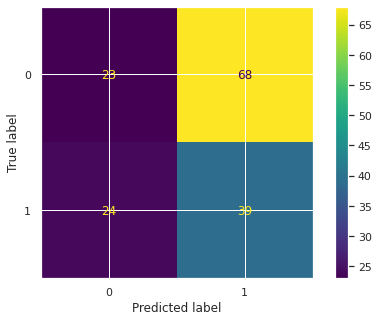

      Iter       Train Loss      OOB Improve   Remaining Time 
         1           1.3803           0.0005            1.22s
         2           1.3731           0.0010            1.52s
         3           1.3695           0.0005            1.50s
         4           1.3710           0.0013            1.50s
         5           1.3697           0.0018            1.54s
         6           1.3798          -0.0006            1.57s
         7           1.3589           0.0006            1.78s
         8           1.3837           0.0000            2.21s
         9           1.3645           0.0010            2.20s
        10           1.3606           0.0001            2.18s
        20           1.3416          -0.0002            1.66s
        30           1.3477           0.0009            1.44s
        40           1.3335          -0.0002            1.32s
        50           1.3216           0.0002            1.24s
        60           1.3375          -0.0006            1.19s
       

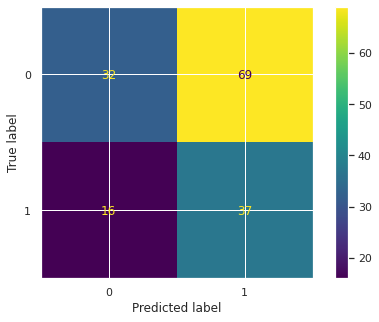

      Iter       Train Loss      OOB Improve   Remaining Time 
         1           1.3788          -0.0005            2.08s
         2           1.3864           0.0000            2.13s
         3           1.3766          -0.0005            2.01s
         4           1.3784           0.0002            1.95s
         5           1.3788           0.0001            1.90s
         6           1.3803          -0.0005            1.91s
         7           1.3820          -0.0012            1.96s
         8           1.3833           0.0005            1.90s
         9           1.3695          -0.0011            1.91s
        10           1.3696          -0.0002            1.88s
        20           1.3660           0.0000            1.44s
        30           1.3533          -0.0009            1.30s
        40           1.3511          -0.0001            1.21s
        50           1.3526           0.0003            1.16s
        60           1.3333          -0.0003            1.12s
       

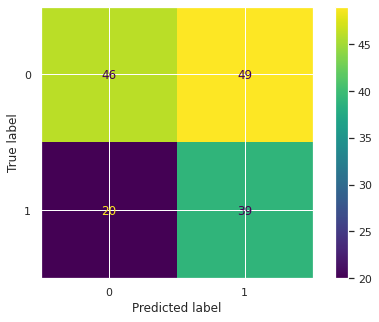

      Iter       Train Loss      OOB Improve   Remaining Time 
         1           1.3780          -0.0005            1.76s
         2           1.3838          -0.0002            1.90s
         3           1.3823          -0.0011            1.79s
         4           1.3736          -0.0004            1.73s
         5           1.3763           0.0012            1.68s
         6           1.3740           0.0014            1.67s
         7           1.3818          -0.0003            1.65s
         8           1.3766           0.0008            1.63s
         9           1.3850           0.0000            1.62s
        10           1.3622          -0.0011            1.61s
        20           1.3632           0.0004            1.44s
        30           1.3575           0.0002            1.30s
        40           1.3530          -0.0015            1.23s
        50           1.3420           0.0005            1.17s
        60           1.3449          -0.0003            1.15s
       

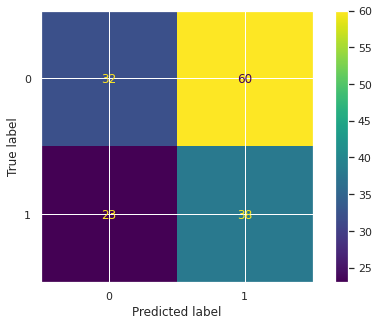

      Iter       Train Loss      OOB Improve   Remaining Time 
         1           1.3450          -0.0002            1.21s
         2           1.2991           0.0000            1.52s
         3           1.3638          -0.0011            1.64s
         4           1.3076           0.0001            1.61s
         5           1.3157          -0.0000            1.59s
         6           1.3373          -0.0000            1.57s
         7           1.3024          -0.0013            1.77s
         8           1.3475          -0.0008            1.80s
         9           1.3192          -0.0002            1.81s
        10           1.3225           0.0004            1.79s
        20           1.3098          -0.0004            1.93s
        30           1.3121           0.0001            1.61s
        40           1.2952           0.0002            1.44s
        50           1.3279           0.0002            1.33s
        60           1.3350          -0.0003            1.26s
       

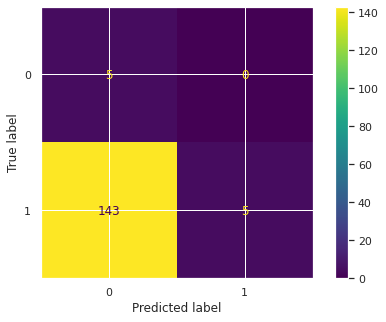


===================[검증]===================
acc_mean : 0.38509464391817333
rec_mean : 0.5269824758406492
prec_mean : 0.5088959010609261
f1_mean : 0.39963829556980024


In [ ]:
from sklearn.model_selection import KFold
from sklearn.preprocessing import RobustScaler, StandardScaler
from sklearn.ensemble import StackingClassifier, GradientBoostingClassifier, HistGradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay, confusion_matrix, recall_score, precision_score, f1_score

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import joblib

X = x_train_over.values
Y = y_train_over.values
validation = []
kfold = KFold(n_splits=5)
# clf = joblib.load('clf_Titanic_GB_v2.2.0.pkl')

for train_index, test_index in kfold.split(X):
    x_train, x_val = X[train_index], X[test_index]
    y_train, y_val = Y[train_index], Y[test_index]

    clf = make_pipeline(
        RobustScaler(),
        GradientBoostingClassifier(
            init = None,
            criterion = 'friedman_mse',
            learning_rate = 0.03,
            loss = 'deviance',
            max_depth = 8,
            max_features = 'auto',
            max_leaf_nodes = 2,
            min_samples_leaf = 2,
            min_samples_split = 2,
            n_estimators = 1000,
            n_iter_no_change = 300,
            subsample = 0.5,
            tol = 0.05,
            verbose = 1,
            random_state=1
        )
    )

    y_pred = clf.fit(x_train, y_train).predict(x_val)
    validation.append(
        (
            accuracy_score(y_val, y_pred),
            recall_score(y_val, y_pred),
            precision_score(y_val, y_pred),
            f1_score(y_val, y_pred)
         )
    )

    print(f'accuracy_score : {accuracy_score(y_val, y_pred)}')
    print(f'recall_score : {recall_score(y_val, y_pred)}')
    print(f'precision_score : {precision_score(y_val, y_pred)}')
    print(f'f1_score : {f1_score(y_val, y_pred)}')
    print()

    sns.set_theme()
    plt.rcParams['figure.figsize'] = (8, 5)

    conf = ConfusionMatrixDisplay(
        confusion_matrix = confusion_matrix(y_val, y_pred),
        display_labels = clf.classes_
    )
    conf.plot()

    plt.show()

acc_mean = np.mean([x[0] for x in validation])
rec_mean = np.mean([x[1] for x in validation])
prec_mean = np.mean([x[2] for x in validation])
f1_mean = np.mean([x[3] for x in validation])

print()
print('===================[검증]===================')
print(f'acc_mean : {acc_mean}')
print(f'rec_mean : {rec_mean}')
print(f'prec_mean : {prec_mean}')
print(f'f1_mean : {f1_mean}')

##### 평가

In [ ]:
y_pred = clf.predict(x_test)

print()
print('===================[평가]===================')
print(f'accuracy_score : {accuracy_score(y_test, y_pred)}')
print(f'recall_score : {recall_score(y_test, y_pred)}')
print(f'precision_score : {precision_score(y_test, y_pred)}')
print(f'f1_score : {f1_score(y_test, y_pred)}')


===================[평가]===================
accuracy_score : 0.5970149253731343
recall_score : 0.10679611650485436
precision_score : 0.4074074074074074
f1_score : 0.1692307692307692


#### Age Column 관련

In [ ]:
from sklearn.model_selection import train_test_split

import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/도원결의 시즌2/dowon/도원/titanic.csv', encoding='utf-8', engine='python')

x_train, x_test, y_train, y_test = train_test_split(
    df.drop(['Survived'], axis=1),
    df['Survived'],
    test_size=0.3, shuffle=True, stratify=df['Survived']
)

# train 데이터 셋에 대한 df => Age에 결측값에 mean()으로 채워넣기 위한 빌드업
df = pd.concat([x_train, y_train], axis=1)
df_test = pd.concat([x_test, y_test], axis=1)
df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
486,487,1,"Hoyt, Mrs. Frederick Maxfield (Jane Anne Forby)",female,35.0,1,0,19943,90.0000,C93,S,1
457,458,1,"Kenyon, Mrs. Frederick R (Marion)",female,NaN,1,0,17464,51.8625,D21,S,1
338,339,3,"Dahl, Mr. Karl Edwart",male,45.0,0,0,7598,8.0500,NaN,S,1
196,197,3,"Mernagh, Mr. Robert",male,NaN,0,0,368703,7.7500,NaN,Q,0
681,682,1,"Hassab, Mr. Hammad",male,27.0,0,0,PC 17572,76.7292,D49,C,1


In [ ]:
df.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age            132
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          476
Embarked         1
Survived         0
dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split

## Age column 결측값 채우기
cond_1 = df.loc[(df.SibSp == 0) & (df.Parch == 0)].index
cond_2 = df.loc[(df.Pclass == 3) | (df.Sex == "male") | (df.Survived == 0)].index
new_df = df.loc[cond_1 & cond_2].select_dtypes(exclude='object').drop(['Survived'], axis=1)

x_train, x_test, y_train, y_test = train_test_split(new_df.drop(['Age'], axis=1), new_df[['Age']], shuffle=True, stratify=new_df[['Age']])
x_train

ValueError: ignored

In [ ]:
age_train_features.isnull().sum()

PassengerId    0
Pclass         0
SibSp          0
Parch          0
Fare           0
Survived       0
dtype: int64

In [ ]:
from sklearn.linear_model import LogisticRegression

age_train_features = df_not_age.select_dtypes(exclude='object').drop(['Age'], axis=1)
age_train_target = df_not_age.select_dtypes(exclude='object')[['Age']]
age_test_features = df_age.select_dtypes(exclude='object').drop(['Age'], axis=1)
age_test_target = df_age.select_dtypes(exclude='object')[['Age']]

model = LogisticRegression()
model.fit(age_train_features, age_train_target)
# predict(age_test_features)

ValueError: ignored

#### Phase 4. Cabin column 포함

##### 데이터 셋 생성

In [ ]:
from sklearn.model_selection import train_test_split

import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/도원결의 시즌2/dowon/도원/titanic.csv', encoding='utf-8', engine='python')

x_train, x_test, y_train, y_test = train_test_split(
    df.drop(['Survived'], axis=1),
    df['Survived'],
    test_size=0.3, shuffle=True, stratify=df['Survived']
)

# train 데이터 셋에 대한 df => Age에 결측값에 mean()으로 채워넣기 위한 빌드업
df = pd.concat([x_train, y_train], axis=1)
df_test = pd.concat([x_test, y_test], axis=1)
df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
493,494,1,"Artagaveytia, Mr. Ramon",male,71.0,0,0,PC 17609,49.5042,NaN,C,0
507,508,1,"Bradley, Mr. George (""George Arthur Brayton"")",male,NaN,0,0,111427,26.5500,NaN,S,1
265,266,2,"Reeves, Mr. David",male,36.0,0,0,C.A. 17248,10.5000,NaN,S,0
377,378,1,"Widener, Mr. Harry Elkins",male,27.0,0,2,113503,211.5000,C82,C,0
239,240,2,"Hunt, Mr. George Henry",male,33.0,0,0,SCO/W 1585,12.2750,NaN,S,0


In [ ]:
from sklearn.preprocessing import LabelEncoder

import numpy as np

def unify_cabin(x):
    result = ""
    if type(x) == float:
        return np.nan
    result = x[0]
    return result

def find_missing_elements(arr1, arr2):
    missing_elements = []
    for element in arr1:
        if element not in arr2:
            missing_elements.append(element)
    return missing_elements

df.Cabin = df.Cabin.apply(unify_cabin)
encoder = LabelEncoder()
df.Cabin = encoder.fit_transform(df.Cabin)

df_test.Cabin = df_test.Cabin.apply(unify_cabin)
encoder = LabelEncoder()
df_test.Cabin = encoder.fit_transform(df_test.Cabin)

# one_hot = pd.get_dummies(df.Cabin)
# one_hot_column_1 = list(map(str, one_hot.columns.tolist()))
# one_hot.columns = one_hot_column_1
# df = pd.concat([df, one_hot], axis=1)

# one_hot = pd.get_dummies(df_test.Cabin)
# one_hot_column_2 = list(map(str, one_hot.columns.tolist()))
# one_hot.columns = one_hot_column_2
# df_test = pd.concat([df_test, one_hot], axis=1)

# df.drop(find_missing_elements(df.columns, df_test.columns), axis=1, inplace=True)

In [ ]:
from sklearn.preprocessing import LabelEncoder

import math
import warnings

warnings.filterwarnings("ignore")

## Sex column 처리
encoder = LabelEncoder()
df.Sex = encoder.fit_transform(df.Sex)

## Age column 결측값 채우기
cond_1 = df.loc[(df.SibSp == 0) & (df.Parch == 0)].index
cond_2 = df.loc[(df.Pclass == 3) | (df.Sex == "male") | (df.Survived == 0)].index
new_df = df.loc[cond_1 & cond_2]
df.Age.fillna(int(round(df.Age.mean(), 0)), inplace=True)
df.loc[df.Age % 1 != 0, "Age"] = df.loc[df.Age % 1 != 0, "Age"].apply(math.floor)
df.Age = df.Age.astype(int)

## Embarked column 처리 [결측값, 원핫인코딩]
df.Embarked.fillna("S", inplace=True)
df = pd.concat([df, pd.get_dummies(df.Embarked)], axis=1)
df.drop(['Embarked'], axis=1, inplace=True)

In [ ]:
# test 데이터 처리

## Sex column 처리
encoder = LabelEncoder()
df_test.Sex = encoder.fit_transform(df_test.Sex)

## Age column 결측값 채우기
cond_1 = df.loc[(df.SibSp == 0) & (df.Parch == 0)].index
cond_2 = df.loc[(df.Pclass == 3) | (df.Sex == "male") | (df.Survived == 0)].index
new_df = df.loc[cond_1 & cond_2]

df_test.Age.fillna(int(round(new_df.Age.mean(), 0)), inplace=True)
df_test.loc[df_test.Age % 1 != 0, "Age"] = df_test.loc[df_test.Age % 1 != 0, "Age"].apply(math.floor)
df_test.Age = df_test.Age.astype(int)

## Embarked column 처리 [결측값, 원핫인코딩]
df_test.Embarked.fillna("S", inplace=True)
df_test = pd.concat([df_test, pd.get_dummies(df_test.Embarked)], axis=1)
df_test.drop(['Embarked'], axis=1, inplace=True)

## object column 4가지['PassengerId', 'Ticket', 'Name', 'Cabin'] 제거
df.drop(['PassengerId', 'Ticket', 'Name', 'Cabin'], axis=1, inplace=True)
df_test.drop(['PassengerId', 'Ticket', 'Name', 'Cabin'], axis=1, inplace=True)

x_train = df.drop(['Survived'], axis=1)
x_test = df_test.drop(['Survived'], axis=1)

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

temp_df = pd.DataFrame()
X = x_train.copy()
x_train.drop(['S'], axis=1, inplace=True)
x_test.drop(['S'], axis=1, inplace=True)
X.drop(['S'], axis=1, inplace=True)
temp_df['Feature'] = X.columns
temp_df['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]


temp_df

,Feature,VIF
0,Pclass,5.251569
1,Sex,3.129673
2,Age,4.444980
3,SibSp,1.531487
4,Parch,1.575449
5,Fare,1.766301
6,C,1.361226
7,Q,1.190305


In [ ]:
import statsmodels.formula.api as smi

result = smi.ols(formula="Survived ~ Pclass + Sex + Age + SibSp + C + Q", data=df).fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:               Survived   R-squared:                       0.407
Model:                            OLS   Adj. R-squared:                  0.401
Method:                 Least Squares   F-statistic:                     70.40
Date:                Mon, 20 Mar 2023   Prob (F-statistic):           1.14e-66
Time:                        10:58:04   Log-Likelihood:                -272.17
No. Observations:                 623   AIC:                             558.3
Df Residuals:                     616   BIC:                             589.4
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.2693      0.074     17.095      0.0

In [ ]:
#@title 오버샘플링
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder

smote = SMOTE(random_state=42) # SMOTE 객체 생성

# 그냥 전처리가 아니라 단순히 SMOTE 기법을 시도하는 것이기 때문에 그냥 다버리고 오버샘플링 한번 보자.
x_train_over, y_train_over = smote.fit_resample(x_train, y_train)

pd.DataFrame(y_train_over).Survived.value_counts() # SMOTE 를 활용한 오버샘플링 적용 된 것 확인

0    384
1    384
Name: Survived, dtype: int64

In [ ]:
#@title 언더샘플링

# y_train_df = pd.DataFrame(y_train, columns=["Survived"])
# idx_0 = y_train_df.loc[y_train_df.Survived == 0].sample(y_train.value_counts()[1], random_state=68).index.tolist()
# idx_1 = y_train_df.loc[y_train_df.Survived == 1].index.tolist()
# random_idx = idx_0 + idx_1
# x_train_under = x_train.loc[random_idx]
# y_train_under = y_train_df.loc[random_idx]

# print(x_train_under.shape, '\n')
# print(y_train_under.shape, '\n')

##### 학습 & 검증

      Iter       Train Loss      OOB Improve   Remaining Time 
         1           1.3655           0.0185            1.74s
         2           1.3375           0.0171            1.76s
         3           1.3294           0.0162            1.66s
         4           1.3130           0.0152            1.60s
         5           1.2870           0.0142            1.55s
         6           1.2772           0.0134            1.56s
         7           1.2842           0.0126            1.53s
         8           1.2565           0.0121            1.52s
         9           1.2599           0.0112            1.51s
        10           1.2332           0.0107            1.50s
        20           1.1604           0.0069            1.20s
        30           1.1271           0.0037            1.09s
        40           1.0341           0.0034            1.03s
        50           1.0250           0.0017            0.99s
        60           0.9517           0.0021            1.01s
       

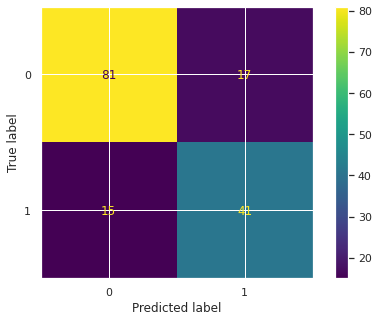

      Iter       Train Loss      OOB Improve   Remaining Time 
         1           1.3703           0.0181            1.57s
         2           1.3445           0.0165            1.82s
         3           1.3362           0.0156            1.84s
         4           1.3275           0.0150            1.82s
         5           1.3099           0.0144            1.80s
         6           1.3022           0.0132            1.81s
         7           1.2846           0.0128            1.80s
         8           1.2613           0.0118            1.77s
         9           1.2508           0.0107            1.76s
        10           1.2497           0.0106            1.76s
        20           1.1254           0.0056            1.56s
        30           1.1456           0.0024            1.46s
        40           1.1116           0.0033            1.40s
        50           1.0281           0.0018            1.36s
        60           0.9994           0.0015            1.32s
       

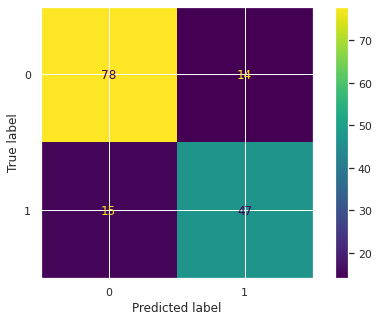

      Iter       Train Loss      OOB Improve   Remaining Time 
         1           1.3651           0.0189            5.25s
         2           1.3344           0.0174            3.72s
         3           1.3307           0.0168            3.07s
         4           1.3118           0.0158            3.17s
         5           1.2962           0.0148            2.85s
         6           1.2817           0.0140            2.67s
         7           1.2609           0.0131            2.56s
         8           1.2547           0.0125            2.45s
         9           1.2518           0.0115            2.36s
        10           1.2293           0.0109            2.29s
        20           1.1416           0.0070            1.75s
        30           1.0612           0.0039            1.57s
        40           1.0768           0.0029            1.46s
        50           1.0352           0.0023            1.40s
        60           1.0477           0.0015            1.36s
       

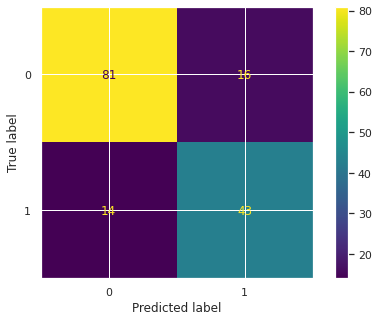

      Iter       Train Loss      OOB Improve   Remaining Time 
         1           1.3697           0.0214            1.24s
         2           1.3460           0.0204            3.22s
         3           1.3279           0.0192            2.77s
         4           1.3035           0.0179            2.73s
         5           1.2913           0.0172            2.52s
         6           1.2795           0.0162            2.39s
         7           1.2718           0.0153            2.28s
         8           1.2337           0.0144            2.21s
         9           1.2432           0.0138            2.17s
        10           1.2394           0.0131            2.12s
        20           1.1485           0.0075            1.66s
        30           1.0545           0.0054            1.51s
        40           1.0058           0.0034            1.42s
        50           1.0246           0.0021            1.36s
        60           1.0370           0.0012            1.31s
       

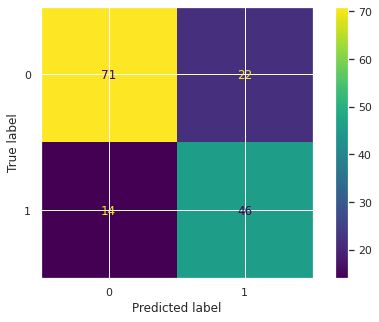

      Iter       Train Loss      OOB Improve   Remaining Time 
         1           1.2878           0.0193            1.42s
         2           1.2838           0.0174            1.77s
         3           1.2839           0.0165            1.83s
         4           1.2722           0.0148            1.79s
         5           1.2295           0.0132            1.68s
         6           1.2297           0.0132            1.61s
         7           1.2055           0.0124            1.77s
         8           1.2261           0.0115            1.75s
         9           1.2090           0.0109            1.73s
        10           1.2187           0.0101            1.71s
        20           1.1188           0.0058            1.43s
        30           1.0682           0.0037            1.33s
        40           0.9791           0.0023            1.32s
        50           1.0640           0.0010            1.28s
        60           0.9583           0.0007            1.27s
       

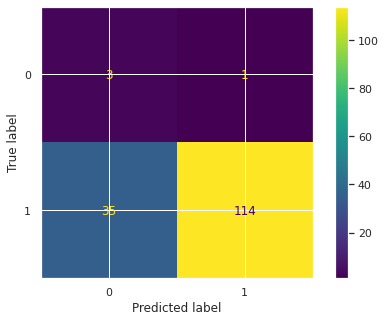


===================[검증]===================
acc_mean : 0.7877005347593583
rec_mean : 0.7552721351983552
prec_mean : 0.7747953700772483
f1_mean : 0.7614583123743299


In [ ]:
from sklearn.model_selection import KFold
from sklearn.preprocessing import RobustScaler, StandardScaler
from sklearn.ensemble import StackingClassifier, GradientBoostingClassifier, HistGradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay, confusion_matrix, recall_score, precision_score, f1_score


import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import joblib

X = x_train_over.values
Y = y_train_over.values
validation = []
kfold = KFold(n_splits=5)
# clf = joblib.load('clf_Titanic_GB_v2.2.0.pkl')

for train_index, test_index in kfold.split(X):
    x_train, x_val = X[train_index], X[test_index]
    y_train, y_val = Y[train_index], Y[test_index]

    clf = make_pipeline(
        GradientBoostingClassifier(
            init = None,
            criterion = 'friedman_mse',
            learning_rate = 0.03,
            loss = 'deviance',
            max_depth = 8,
            max_features = 'auto',
            max_leaf_nodes = 2,
            min_samples_leaf = 2,
            min_samples_split = 2,
            n_estimators = 1000,
            n_iter_no_change = 300,
            subsample = 0.5,
            tol = 0.05,
            verbose = 1,
            random_state=2
        )
    )

    y_pred = clf.fit(x_train, y_train).predict(x_val)
    validation.append(
        (
            accuracy_score(y_val, y_pred),
            recall_score(y_val, y_pred),
            precision_score(y_val, y_pred),
            f1_score(y_val, y_pred)
         )
    )

    print(f'accuracy_score : {accuracy_score(y_val, y_pred)}')
    print(f'recall_score : {recall_score(y_val, y_pred)}')
    print(f'precision_score : {precision_score(y_val, y_pred)}')
    print(f'f1_score : {f1_score(y_val, y_pred)}')
    print()

    sns.set_theme()
    plt.rcParams['figure.figsize'] = (8, 5)

    conf = ConfusionMatrixDisplay(
        confusion_matrix = confusion_matrix(y_val, y_pred),
        display_labels = clf.classes_
    )
    conf.plot()

    plt.show()

acc_mean = np.mean([x[0] for x in validation])
rec_mean = np.mean([x[1] for x in validation])
prec_mean = np.mean([x[2] for x in validation])
f1_mean = np.mean([x[3] for x in validation])

print()
print('===================[검증]===================')
print(f'acc_mean : {acc_mean}')
print(f'rec_mean : {rec_mean}')
print(f'prec_mean : {prec_mean}')
print(f'f1_mean : {f1_mean}')

##### 평가

In [ ]:
y_pred = clf.predict(x_test)

print()
print('===================[평가]===================')
print(f'accuracy_score : {accuracy_score(y_test, y_pred)}')
print(f'recall_score : {recall_score(y_test, y_pred)}')
print(f'precision_score : {precision_score(y_test, y_pred)}')
print(f'f1_score : {f1_score(y_test, y_pred)}')


===================[평가]===================
accuracy_score : 0.8097014925373134
recall_score : 0.7281553398058253
precision_score : 0.7653061224489796
f1_score : 0.7462686567164178


<br>

## 4. Train the model

<br>

## 5. Predict on test data & Check the result with metrics (모델 간 비교가 가능합니다.)

### 하이퍼 파라미터 모음

In [ ]:
hyper_parameters = {
	'criterion': 'friedman_mse',
	'init': None,
	'learning_rate': 0.03,
	'loss': 'deviance',
	'max_depth': 8,
	'max_features': 'auto',
	'max_leaf_nodes': 2,
	'min_samples_leaf': 2,
	'min_samples_split': 2,
	'n_estimators': 1000,
	'n_iter_no_change': 300,
	'subsample': 0.5,
	'tol': 0.05
}

0      NaN
1        C
2      NaN
3        C
4      NaN
      ... 
886    NaN
887      B
888    NaN
889      C
890    NaN
Name: Cabin, Length: 891, dtype: object